# Coursework ML Beginner
<br>

**NB!** The code should be with comments for each logical block of the code. Otherwise, the work will **not** be accepted. <br><br>
Completing coursework may require the use of additional libraries. Data preprocessing may be required.

<br><br>
**Work description:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Any business wants to maximize the number of customers. To achieve this goal, it is important not only to try to attract new ones, but also to retain existing ones. Retaining a client will cost the company less than attracting a new one. In addition, a new client may be weakly interested in business services and it will be difficult to work with him, while old clients already have the necessary data on interaction with the service.
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Accordingly, predicting the churn, we can react in time and try to keep the client who wants to leave. Based on the data about the services that the client uses, we can make him a special offer, trying to change his decision to leave the operator. This will make the task of retention easier to implement than the task of attracting new users, about which we do not know anything yet.<br>

&nbsp;&nbsp;&nbsp;&nbsp; You are provided with a dataset from a telecommunications company. The data contains information about almost six thousand users, their demographic characteristics, the services they use, the duration of using the operator's services, the method of payment, and the amount of payment.
<br>

&nbsp;&nbsp;&nbsp;&nbsp; The task is to analyze the data and predict the churn of users (identify people who will and will not renew the contract). The work should include the following mandatory items:
1. Data description *(with the calculation of basic statistics)*,
2. Dependencies research and form the hypotheses,
3. Models building to predict a churn *(with justification of the choice of a particular model)* based on tested hypotheses and identified relationships,
4. Models quality comparison.

In the second section, there must be a justification of hypotheses, a detailed description of the identified relationships, as well as their visualization.
<br>In the fourth, the general conclusions of the work should be formulated additionally.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Data description](#1.-Data-description)<br>
[2. Dependencies research and form the hypotheses](#2.-Dependencies-research-and-form-the-hypotheses)<br>
[3. Models building to predict a churn](#3.-Models-building-to-predict-a-churn)<br>
[4. Models quality comparison](#4.-Models-quality-comparison) <br>

# 1. Data description

In [1]:
# Import libraries

# data analysis, array processing
import numpy as np
import pandas as pd

# visualization
from matplotlib import pyplot as plt, rc, cm, lines
import seaborn as sns

# data transform
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD
from sklearn.manifold import TSNE

# machine learning
from sklearn.model_selection import train_test_split, \
    StratifiedKFold, GridSearchCV, cross_val_predict
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, \
    RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
import xgboost as XGB

# machine learning metrics
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, \
    precision_score, recall_score, f1_score, classification_report, roc_curve

# statistical metrics
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy import stats

You may find the entire stacking class here - [STACKING](https://github.com/RuslanOraev/handmade-data-science/blob/main/my-own-library/ensemble_stacking.py)

In [2]:
# I don't want this class in the middle of work because it's too large. So I import it from github repository.
import requests
import os
# get content by URL and decode as utf-8
url='https://github.com/RuslanOraev/handmade-data-science/raw/main/my-own-library/ensemble_stacking.py'
content=requests.get(url).content
text=content.decode('utf-8')
# write content in a file
with open ('ensemble_stacking.py', 'w', encoding="utf-8") as line:
    line.write(text)

# import Stacking from a file
from ensemble_stacking import Stacking
# remove temporary file
os.remove('ensemble_stacking.py')

In [3]:
# matplotlib parameters
rc('font', size=14)
rc('figure', figsize=(10,8))

In [4]:
# max enable number of displaying columns
pd.options.display.max_columns = 25

In [5]:
# load data from a github repository using url
url = 'https://github.com/RuslanOraev/handmade-data-science/raw/main/datasets/telecom_users.csv'
df_raw = pd.read_csv(url).rename(columns={'Unnamed: 0': 'old_index'})
df_raw.head()

old_index  customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0       1869  7010-BRBUU    Male              0     Yes        Yes      72   
1       4528  9688-YGXVR  Female              0      No         No      44   
2       6344  9286-DOJGF  Female              1     Yes         No      38   
3       6739  6994-KERXL    Male              0      No         No       4   
4        432  2181-UAESM    Male              0      No         No       2   

  PhoneService MultipleLines InternetService       OnlineSecurity  \
0          Yes           Yes              No  No internet service   
1          Yes            No     Fiber optic                   No   
2          Yes           Yes     Fiber optic                   No   
3          Yes            No             DSL                   No   
4          Yes            No             DSL                  Yes   

          OnlineBackup     DeviceProtection          TechSupport  \
0  No internet service  No internet service  No internet service   
1                  Yes                  Yes                   No   
2                   No                   No                   No   
3                   No                   No                   No   
4                   No                  Yes                   No   

           StreamingTV      StreamingMovies        Contract PaperlessBilling  \
0  No internet service  No internet service        Two year               No   
1                  Yes                   No  Month-to-month              Yes   
2                   No                   No  Month-to-month              Yes   
3                   No                  Yes  Month-to-month              Yes   
4                   No                   No  Month-to-month               No   

               PaymentMethod  MonthlyCharges TotalCharges Churn  
0    Credit card (automatic)           24.10      1734.65    No  
1    Credit card (automatic)           88.15       3973.2    No  
2  Bank transfer (automatic)           74.95      2869.85   Yes  
3           Electronic check           55.90        238.5    No  
4           Electronic check           53.45        119.5    No

In [6]:
# info about dataset
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   old_index         5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


**Info**
* There's no any null values;
* customerID and old_index should be dropped - they can not affect to the target feature.

In [7]:
# drop unnecessary columns
df_raw = df_raw.drop(['old_index', 'customerID'], axis=1)

In [8]:
# get columns of dataset and print unique sorted values. Returns None
def print_unique(*args):
    for column in args:
        print(f'{column}: {df_raw[column].sort_values().unique()}')

Let's check all the unique values of columns is correct and figure it out if there a reason to fix it.

In [9]:
# print all the unique sorted values of each column
print_unique(*df_raw.columns.to_list())

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['No' 'Yes']
Dependents: ['No' 'Yes']
tenure: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72]
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'No phone service' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'No internet service' 'Yes']
OnlineBackup: ['No' 'No internet service' 'Yes']
DeviceProtection: ['No' 'No internet service' 'Yes']
TechSupport: ['No' 'No internet service' 'Yes']
StreamingTV: ['No' 'No internet service' 'Yes']
StreamingMovies: ['No' 'No internet service' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['No' 'Yes']
PaymentMethod: ['Bank transfer (automatic)' 'Credit card (automatic)' 'Electronic check'
 'Mailed check']
MonthlyCharges: [ 18.25  18.4   18.55 ... 118.6  118.65 118.75]
Tot

**Typos and errors**
* Column "TotalCharges" should be a float type and not the object including strings; 
* Column "TotalCharges" has a strings with a gap. It has to be fixed to convert that column to float type.

In [10]:
# search for the rows with a gap in "TotalCharges"
df_raw[df_raw['TotalCharges'] == ' ']

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
356     Male              0      No        Yes       0          Yes   
634   Female              0     Yes        Yes       0           No   
2771    Male              0     Yes        Yes       0          Yes   
3086    Male              0     Yes        Yes       0          Yes   
3255    Male              0     Yes        Yes       0          Yes   
4326  Female              0     Yes        Yes       0          Yes   
5375    Male              0      No        Yes       0          Yes   
5382  Female              0     Yes        Yes       0          Yes   
5695  Female              0     Yes        Yes       0           No   
5951    Male              0     Yes        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
356                Yes             DSL                  Yes   
634   No phone service             DSL                  Yes   
2771               Yes              No  No internet service   
3086                No              No  No internet service   
3255                No              No  No internet service   
4326                No             DSL                  Yes   
5375                No              No  No internet service   
5382                No              No  No internet service   
5695  No phone service             DSL                  Yes   
5951               Yes              No  No internet service   

             OnlineBackup     DeviceProtection          TechSupport  \
356                   Yes                   No                  Yes   
634                   Yes                  Yes                  Yes   
2771  No internet service  No internet service  No internet service   
3086  No internet service  No internet service  No internet service   
3255  No internet service  No internet service  No internet service   
4326                  Yes                  Yes                   No   
5375  No internet service  No internet service  No internet service   
5382  No internet service  No internet service  No internet service   
5695                   No                  Yes                  Yes   
5951  No internet service  No internet service  No internet service   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
356                    No                   No  Two year              Yes   
634                   Yes                   No  Two year               No   
2771  No internet service  No internet service  Two year               No   
3086  No internet service  No internet service  One year              Yes   
3255  No internet service  No internet service  Two year               No   
4326                  Yes                  Yes  Two year               No   
5375  No internet service  No internet service  Two year               No   
5382  No internet service  No internet service  Two year               No   
5695                  Yes                   No  Two year              Yes   
5951  No internet service  No internet service  Two year               No   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
356   Bank transfer (automatic)           61.90                 No  
634     Credit card (automatic)           56.05                 No  
2771               Mailed check           25.35                 No  
3086               Mailed check           19.70                 No  
3255               Mailed check           19.85                 No  
4326               Mailed check           80.85                 No  
5375               Mailed check           20.25                 No  
5382               Mailed check           20.00                 No  
5695  Bank transfer (automatic)           52.55                 No  
5951               Mailed check           25.75                 No

In [11]:
# Ignore clients with no Total Charges
df_raw = df_raw[~(df_raw['TotalCharges'] == ' ')]
# set index from 0 to number of objects
df_raw.index = range(len(df_raw))
# set float type in "TotalCharges" column
df_raw['TotalCharges'] = df_raw['TotalCharges'].astype(float)

**Lines with a gap in the "TotalCharges" column**
* All the clients with a tenure same to 0 have a gap in "TotalCharges" column. This clients also have a Churn same to 0;
* All these customers just signed their contracts. This is a start of their first month. Until this they did not paid even once;
* We can't judge yet will they depart or remain after 1st month. I will ignore them in further;
* If that group had have the departed customers, it would worth to analyze them but it's not.

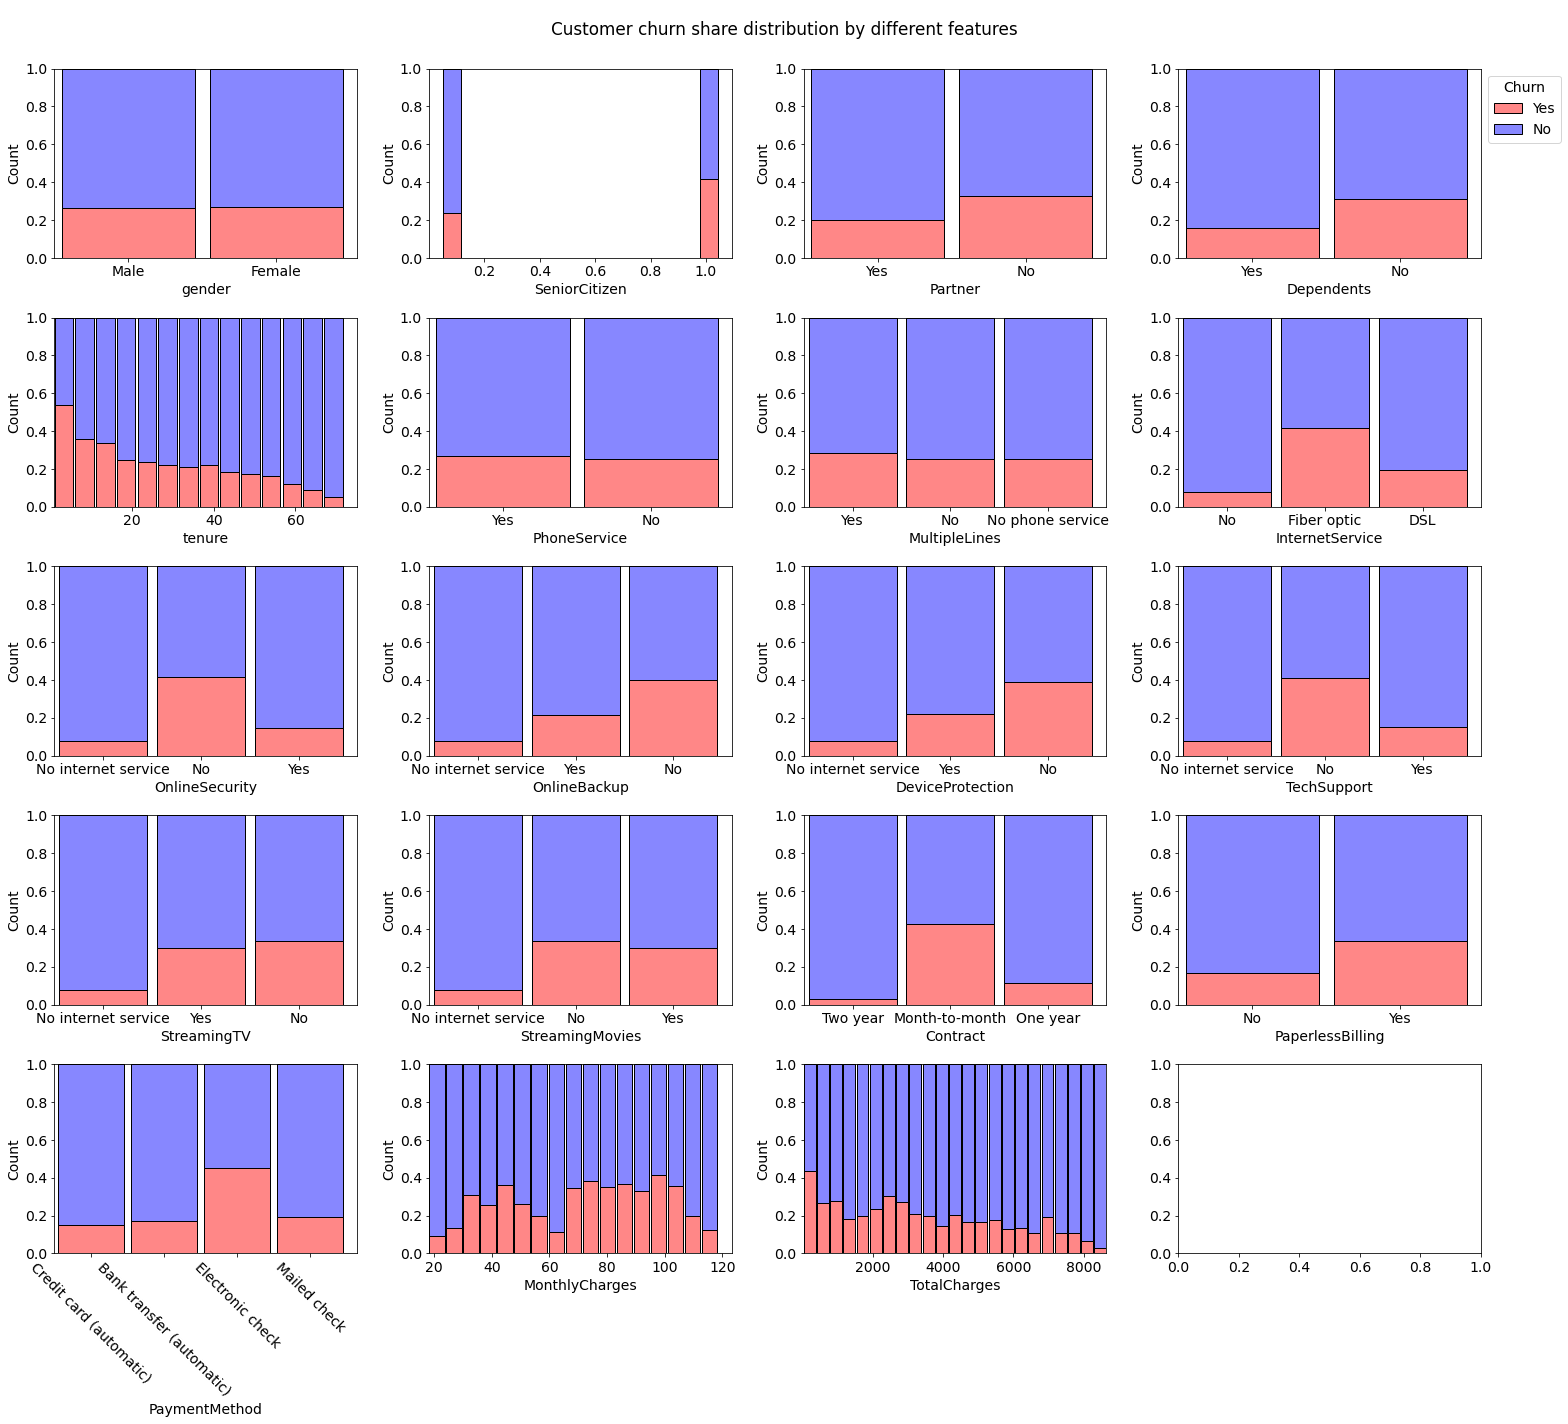

In [12]:
# histograms of churn share customers to remaining customers

# row and col lenghts
col_len = 4
row_len = round(len(df_raw.drop('Churn', axis=1).columns)/col_len)

# building histplots
fig, ax = plt.subplots(int(np.ceil(row_len)), col_len, figsize=(22, 20))
for i, col in enumerate(df_raw.drop('Churn', axis=1).columns):
    row_idx = int(i // col_len)
    col_idx = int(i - (col_len * (i // col_len)))
    ax_curr = ax[row_idx, col_idx]
    hist = sns.histplot(data=df_raw, x=col, hue='Churn', palette='seismic', alpha=.7, shrink=.9, multiple="fill", ax=ax_curr, legend=False)
    if col == 'PaymentMethod':
        ax_curr.tick_params(axis='x', rotation=-45)
    if row_idx == 0 and col_idx == col_len-1:
        ax_curr.legend(labels=['Yes', 'No'], title='Churn', bbox_to_anchor=(1, 1))
        
ax[0, 1].title._text = '\n\n'
fig.suptitle('Customer churn share distribution by different features')
plt.tight_layout()

**Churn distribution conclusions**
* Seniors (Senior Citizen==1) more likely to have a churn;
* Customers who have no partner (Parnter==No) have more chances to have a churn. It may be bound to lonely ppl moving new house more often;
* If client has no dependents (Dependents==No) the probability to have a churn is twice higher. There may be a same reason;
* More than a half of departed customers leaving the company a the first months (tenure<\?);
* About 50% of customers who have an optic cable (InternetService=="Fiber optic") more likely to have a churn.
* When a client has an ability to connect different services but they are not connected (OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies == No) he more likely to have a churn;
* Short term contract (Contract==Month-to-month) makes customers to have a churn more often;
* Clients using a Paperless Billing (PaperlessBilling==Yes) more likely to have a churn. Maybe interface isn't friendly enough or something;
* People using an Electronic check (PaymentMethod="Electronic check") more likely to have a churn;
* Departed clients have an average of Monthly Charges more than the remained clients;
* As the Total Charges becomes higher - share of departed customers becomes lower. It's simply a reflection of how much time the client has spent with the company.

**Based on "Churn" distributions let's match string values to numbers - put the biggest and smallest shares on the opposite sides but still trying to save the common sence (all the "No" values is 0, "Yes" is 1 and so on). By this way we can see a correlation between features and target better in further.**

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – client's id<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – sex (male - 1/female - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – customer is senior citizen (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – married (Yes - 1, No - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – does the client have dependents (Yes - 1, No - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – how many months a person has been a customer of the company<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – telephone service has been activated (Yes - 1, No - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – multiple phone lines connected (Yes - 1, No - 0, No phone service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – type of internet connection (DSL - 1, Fiber optic - 2, No - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – the online security service has been activated (Yes - 1, No - 0, No internet service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – the online backup service is connected (Yes - 1, No - 0, No internet service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – the client have equipment insurance (Yes - 1, No - 0, No internet service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – the technical support service is connected (Yes - 1, No - 0, No internet service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – streaming TV service is connected (Yes - 1, No - 0, No internet service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – the streaming cinema service activated (Yes - 1, No - 0, No internet service - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – client's contract type (Month-to-month - 0, One year - 1, Two year - 2)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – the client use paperless billing (Yes - 1, No - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – payment method (Electronic check - 3, Mailed check - 2, Bank transfer (automatic) - 1, Credit card (automatic) - 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – monthly payment at the moment<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – the total amount that the client paid for the services for the entire time<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – there has been a churn (Yes - 1 or No - 0)<br>

In [13]:
# Match features to numbers
df = df_raw.copy()

df.loc[df['gender'] == 'Male', 'gender'] = 1
df.loc[df['gender'] == 'Female', 'gender'] = 0

df.loc[df['Partner'] == 'Yes', 'Partner'] = 1
df.loc[df['Partner'] == 'No', 'Partner'] = 0

df.loc[df['Dependents'] == 'Yes', 'Dependents'] = 1
df.loc[df['Dependents'] == 'No', 'Dependents'] = 0

df.loc[df['PhoneService'] == 'Yes', 'PhoneService'] = 1
df.loc[df['PhoneService'] == 'No', 'PhoneService'] = 0

df.loc[df['MultipleLines'] == 'Yes', 'MultipleLines'] = 1
df.loc[df['MultipleLines'] == 'No', 'MultipleLines'] = 0
df.loc[df['MultipleLines'] == 'No phone service', 'MultipleLines'] = 2

df.loc[df['InternetService'] == 'DSL', 'InternetService'] = 1
df.loc[df['InternetService'] == 'No', 'InternetService'] = 0
df.loc[df['InternetService'] == 'Fiber optic', 'InternetService'] = 2

df.loc[df['OnlineSecurity'] == 'Yes', 'OnlineSecurity'] = 1
df.loc[df['OnlineSecurity'] == 'No', 'OnlineSecurity'] = 0
df.loc[df['OnlineSecurity'] == 'No internet service', 'OnlineSecurity'] = 2

df.loc[df['OnlineBackup'] == 'Yes', 'OnlineBackup'] = 1
df.loc[df['OnlineBackup'] == 'No', 'OnlineBackup'] = 0
df.loc[df['OnlineBackup'] == 'No internet service', 'OnlineBackup'] = 2

df.loc[df['DeviceProtection'] == 'Yes', 'DeviceProtection'] = 1
df.loc[df['DeviceProtection'] == 'No', 'DeviceProtection'] = 0
df.loc[df['DeviceProtection'] == 'No internet service', 'DeviceProtection'] = 2

df.loc[df['TechSupport'] == 'Yes', 'TechSupport'] = 1
df.loc[df['TechSupport'] == 'No', 'TechSupport'] = 0
df.loc[df['TechSupport'] == 'No internet service', 'TechSupport'] = 2

df.loc[df['StreamingTV'] == 'Yes', 'StreamingTV'] = 1
df.loc[df['StreamingTV'] == 'No', 'StreamingTV'] = 0
df.loc[df['StreamingTV'] == 'No internet service', 'StreamingTV'] = 2

df.loc[df['StreamingMovies'] == 'Yes', 'StreamingMovies'] = 1
df.loc[df['StreamingMovies'] == 'No', 'StreamingMovies'] = 0
df.loc[df['StreamingMovies'] == 'No internet service', 'StreamingMovies'] = 2

df.loc[df['Contract'] == 'Two year', 'Contract'] = 2
df.loc[df['Contract'] == 'One year', 'Contract'] = 1
df.loc[df['Contract'] == 'Month-to-month', 'Contract'] = 0

df.loc[df['PaperlessBilling'] == 'Yes', 'PaperlessBilling'] = 1
df.loc[df['PaperlessBilling'] == 'No', 'PaperlessBilling'] = 0

df.loc[df['PaymentMethod'] == 'Electronic check', 'PaymentMethod'] = 3
df.loc[df['PaymentMethod'] == 'Mailed check', 'PaymentMethod'] = 2
df.loc[df['PaymentMethod'] == 'Bank transfer (automatic)', 'PaymentMethod'] = 1
df.loc[df['PaymentMethod'] == 'Credit card (automatic)', 'PaymentMethod'] = 0

df.loc[df['Churn'] == 'Yes', 'Churn'] = 1
df.loc[df['Churn'] == 'No', 'Churn'] = 0

# change dtypes of columns from object to int
df.loc[:, 'gender':'PaymentMethod'], df['Churn'] = df.loc[:, 'gender':'PaymentMethod'].astype(int), df['Churn'].astype(int)

In [14]:
# new values of columns
df.head(3)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           1      72             1   
1       0              0        0           0      44             1   
2       0              1        1           0      38             1   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0              1                0               2             2   
1              0                2               0             1   
2              1                2               0             0   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0                 2            2            2                2         2   
1                 1            0            1                0         0   
2                 0            0            0                0         0   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
0                 0              0           24.10       1734.65      0  
1                 1              0           88.15       3973.20      0  
2                 1              1           74.95       2869.85      1

In [15]:
# statistical metrics
desc = df.describe().T
desc['mode'] = df.apply(lambda x: x.value_counts()[x.value_counts().values == x.value_counts().max()].index).T.rename(columns={0: 'mode'})
desc['mode_freq'] = [len(df[df[col] == mode]) for col, mode in zip(desc.index, desc['mode'])]
desc['unique'] = df.apply(lambda x: len(x.unique()), axis=0)
desc['kurtosis'] = kurtosis(df)
desc['skew'] = skew(df)
desc

count         mean          std    min       25%       50%  \
gender            5976.0     0.509371     0.499954   0.00    0.0000     1.000   
SeniorCitizen     5976.0     0.161647     0.368157   0.00    0.0000     0.000   
Partner           5976.0     0.484605     0.499805   0.00    0.0000     0.000   
Dependents        5976.0     0.298025     0.457429   0.00    0.0000     0.000   
tenure            5976.0    32.523092    24.500858   1.00    9.0000    29.000   
PhoneService      5976.0     0.901606     0.297871   0.00    1.0000     1.000   
MultipleLines     5976.0     0.622657     0.657126   0.00    0.0000     1.000   
InternetService   5976.0     1.224565     0.777361   0.00    1.0000     1.000   
OnlineSecurity    5976.0     0.716031     0.795921   0.00    0.0000     1.000   
OnlineBackup      5976.0     0.779284     0.775986   0.00    0.0000     1.000   
DeviceProtection  5976.0     0.773427     0.778070   0.00    0.0000     1.000   
TechSupport       5976.0     0.719880     0.794866   0.00    0.0000     1.000   
StreamingTV       5976.0     0.815428     0.762008   0.00    0.0000     1.000   
StreamingMovies   5976.0     0.821285     0.759556   0.00    0.0000     1.000   
Contract          5976.0     0.692604     0.832028   0.00    0.0000     0.000   
PaperlessBilling  5976.0     0.589859     0.491900   0.00    0.0000     1.000   
PaymentMethod     5976.0     1.681392     1.150832   0.00    1.0000     2.000   
MonthlyCharges    5976.0    64.846687    30.107576  18.25   35.7500    70.425   
TotalCharges      5976.0  2298.060617  2274.127165  18.80  404.3125  1412.150   
Churn             5976.0     0.265562     0.441669   0.00    0.0000     0.000   

                        75%      max   mode  mode_freq  unique  kurtosis  \
gender               1.0000     1.00   1.00       3044       2 -1.998595   
SeniorCitizen        0.0000     1.00   0.00       5010       2  1.379150   
Partner              1.0000     1.00   0.00       3080       2 -1.996204   
Dependents           1.0000     1.00   0.00       4195       2 -1.220029   
tenure              56.0000    72.00   1.00        510      72 -1.387122   
PhoneService         1.0000     1.00   1.00       5388       2  5.272397   
MultipleLines        1.0000     2.00   0.00       2843       3 -0.670347   
InternetService      2.0000     2.00   2.00       2627       3 -1.237629   
OnlineSecurity       1.0000     2.00   0.00       2982       3 -1.211687   
OnlineBackup         1.0000     2.00   0.00       2604       3 -1.237082   
DeviceProtection     1.0000     2.00   0.00       2639       3 -1.237806   
TechSupport          1.0000     2.00   0.00       2959       3 -1.215310   
StreamingTV          1.0000     2.00   0.00       2388       3 -1.218337   
StreamingMovies      1.0000     2.00   0.00       2353       3 -1.212939   
Contract             1.0000     2.00   0.00       3269       3 -1.271921   
PaperlessBilling     1.0000     1.00   1.00       3525       2 -1.866492   
PaymentMethod        3.0000     3.00   3.00       2006       4 -1.399999   
MonthlyCharges      89.9000   118.75  20.05         50    1525 -1.258051   
TotalCharges      3846.9625  8684.80  20.20         10    5610 -0.265145   
Churn                1.0000     1.00   0.00       4389       2 -0.872819   

                      skew  
gender           -0.037490  
SeniorCitizen     1.838246  
Partner           0.061609  
Dependents        0.883160  
tenure            0.231843  
PhoneService     -2.696738  
MultipleLines     0.582091  
InternetService  -0.412659  
OnlineSecurity    0.552519  
OnlineBackup      0.403910  
DeviceProtection  0.417239  
TechSupport       0.543184  
StreamingTV       0.323678  
StreamingMovies   0.311020  
Contract          0.625078  
PaperlessBilling -0.365387  
PaymentMethod    -0.215122  
MonthlyCharges   -0.220631  
TotalCharges      0.949325  
Churn             1.061688

* There is 5976 customers;
* 1587 (26.5%) customers are already departed;
* 4389 are remaining customers.

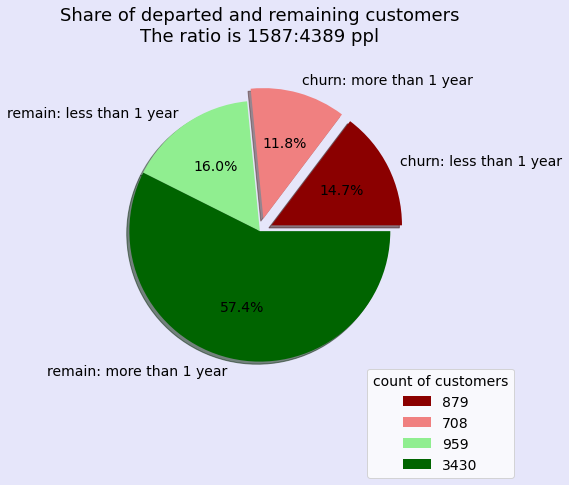

In [16]:
# groupby the customers

# you may change it and watch the share of departed and remaining customers before and after this mark
tenure_mark = 12

# calc the number of the whole years or months
if tenure_mark % 12 == 0:
    mark_name = f'{tenure_mark // 12} year' + bool(tenure_mark // 24) * 's'
else:
    mark_name = f'{tenure_mark} months'
    
# calculating the number of departed and remaining customers before and after the tenure_mark
df_year = df.copy()
df_year['tenure'] = df_year['tenure'].apply(lambda x: f'more than {mark_name}' if x > tenure_mark else f'less than {mark_name}')
df_year['Churn'] = df_year['Churn'].apply(lambda x: 'churn' if x == 1 else 'remain')
df_year_actual = df_year.groupby(['Churn', 'tenure']).size()
df_year_share = df_year_actual.to_frame().apply(lambda x: 100 * x / x.sum())
ratio = df_year_actual.groupby(level=0).sum()

# plot a pie
explode = [0.1, 0.1, 0, 0] 
plt.figure(figsize=(6,6),facecolor='lavender')
plt.pie(df_year_share.values.ravel(), labels=[': '.join(token) for token in df_year_share.index], autopct='%1.1f%%', shadow=True, startangle=0, 
        explode=explode, radius=1, colors=['darkred', 'lightcoral', 'lightgreen', 'darkgreen'])

# plot formatting
plt.title(f'Share of departed and remaining customers\nThe ratio is {ratio.churn}:{ratio.remain} ppl\n', size=18)
plt.legend(labels=df_year_actual, bbox_to_anchor=(1.3, 0.1), title='count of customers')
plt.show()

**Share of churn before and after a year**
* More than a half of leaving customers leave the company in the first year, this is very important time for client to get used to the company;
* The vast majority of remaining customers are already more than a year a part of the company.

# 2. Dependencies research and form the hypotheses

## Precision/recall maximization

Before we start we have to choose what do we want to maximize - precision or recall.

**Selection system**<br>
For a better understanding, let's turn the choice of maximizing precision or recall in answer to the question which of the following is more important in this case:
* prediction reliability (precision).
* the number of positive outcomes found among their total number (recall).

To answer, it necessary to ask the following two questions: 
1. What are the consequences in this case of low precision?<br>
That is, what will happen if you say about a positive outcome, but in fact a negative one will happen?
2. What are the consequences in this case of low recall?<br>
That is, what will happen if not all positive outcomes are marked as positive?

When answering which question the consequences turned out to be worse, that metric should be maximized.. <br>

**Churn has been happen (1 - Churn, 0 - Remain).** <br>
* At low precision many customers who would remain will be marked as potential departed customes;
 <br><br>Potential consequences:
    - a waste of resources on the customers retaining who would have remained;
    - a drop in profits because an increase in proceeds from retained customers may not cover the cost of retaining them.<br><br>

* At low recall many customers who would leave will be marked as potential remained customers.
 <br><br>Potential consequences:
    - a drop in profits. Lost customers - lost proceeds;
    - waste of resources to attracting new clients which may to leave too. Easier way is to retain the old customers.<br><br>

        As we can see the company may lose the profit in both cases and it's hard to say yet which way implies more losing because we still don't know the capabilities of the model. A way out is to try to keep maximum of both a precision and a recall. At the start we can say that all the customers are potential departed, in this case a recall will be 100% but a precision will be about 26% which is so low. So we have to try to increase a precision as maximum as it possible so as not to lose much of a recall.<br><br>
**There is no sense to get maximum of precision or recall - it's bad in both cases. It necessary to achieve maximum when considering these metrics together - f score.**

## Identifying the feature importances through EDA

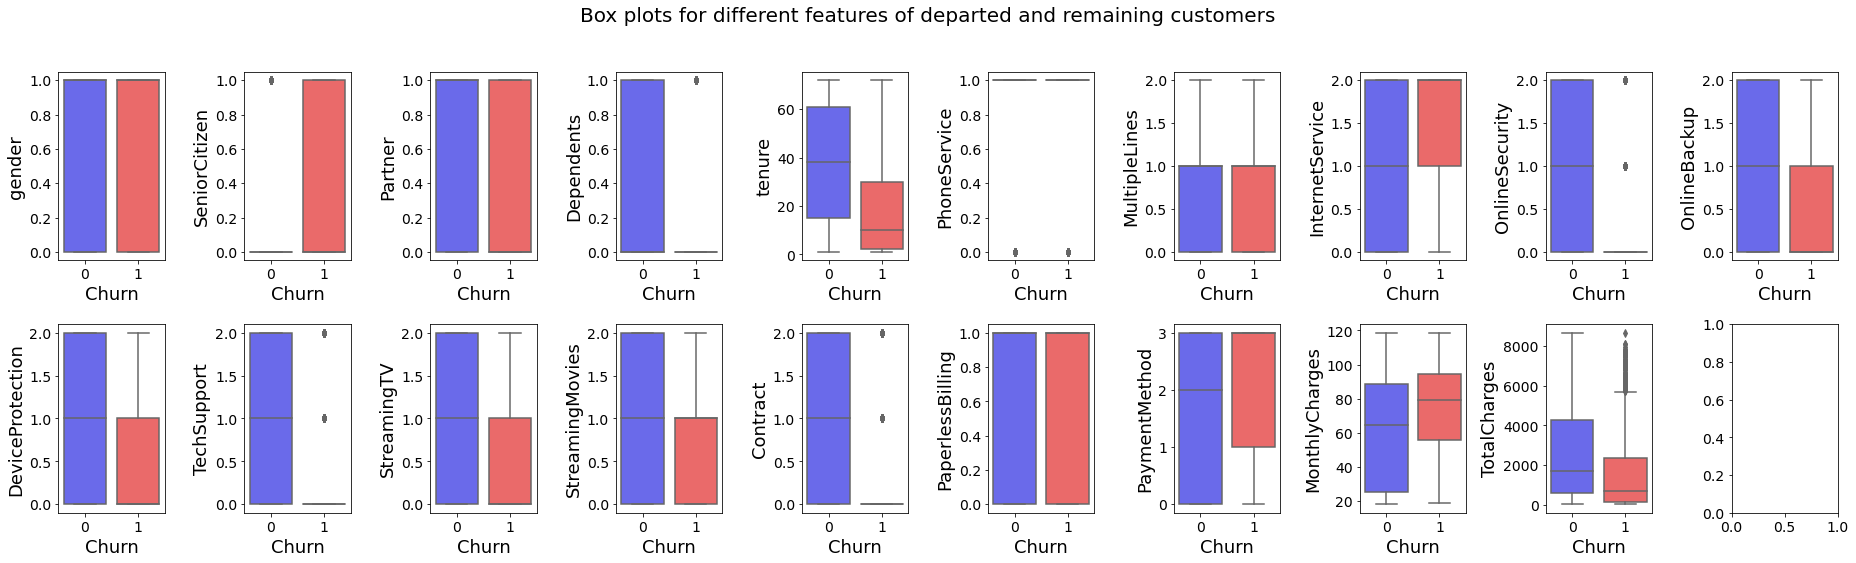

In [17]:
# whisker plots for features by churn

# labelsize
rc('axes', labelsize = 18)

col_len = len(df.drop('Churn', axis=1).columns)/2
fig, ax = plt.subplots(2, int(np.ceil(col_len)), figsize=(26, 8))
for i, col in enumerate(df.drop('Churn', axis=1).columns):
    sns.boxplot(data=df, x='Churn', y=col, ax=ax[int(i // col_len), int(i - (col_len * (i // col_len)))], whis=1.5, palette='seismic')

# plot formatting
ax[0, 1].title._text = '\n\n'
fig.suptitle('Box plots for different features of departed and remaining customers', size=20)
plt.tight_layout()
rc('axes', labelsize = 14)

**Feature importance**
* The feature is more useful than distribution of departed and remaining clients is more different;
* The features like "gender", "Partner", "Multiple Lines" and "Paperless Billing" where the distributions for remaining and churn clients are the same are affectless to the target feature.

In [18]:
# mask to create one cornered correlation
mask = np.zeros_like(df.corr())
mask[np.triu_indices_from(mask)] = True

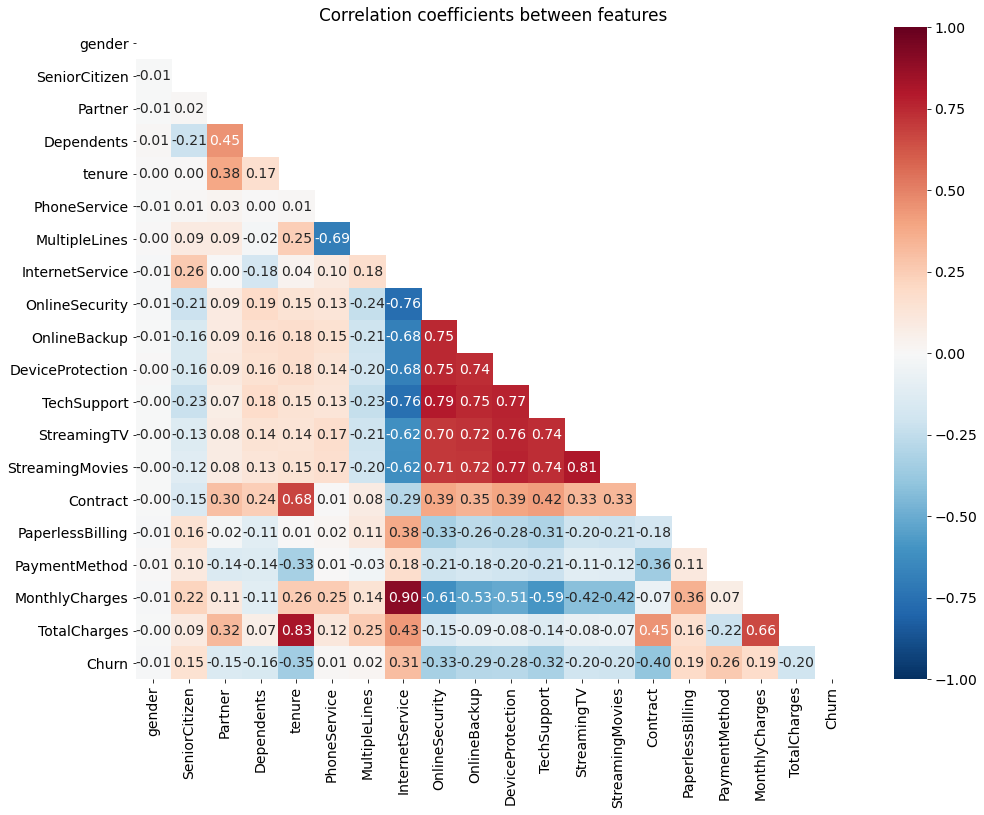

In [19]:
# heatmap of correlation between features
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap='RdBu_r', mask=mask)
plt.title('Correlation coefficients between features')
plt.show()

In [20]:
# strongest feature-target correlation coeffs
target_corr = df.corrwith(df['Churn'])
most_corr_columns = target_corr[target_corr.abs() >= 0.3].drop('Churn')
most_corr_columns.sort_values()

Contract          -0.395848
tenure            -0.350420
OnlineSecurity    -0.329621
TechSupport       -0.323436
InternetService    0.309839
dtype: float64

**Feature importance**
* The most useful features are Contract, tenure, OnlineSecurity, TechSupport and InternetService;
* Columns MonthlyCharges and TotalCharges may also be useful.

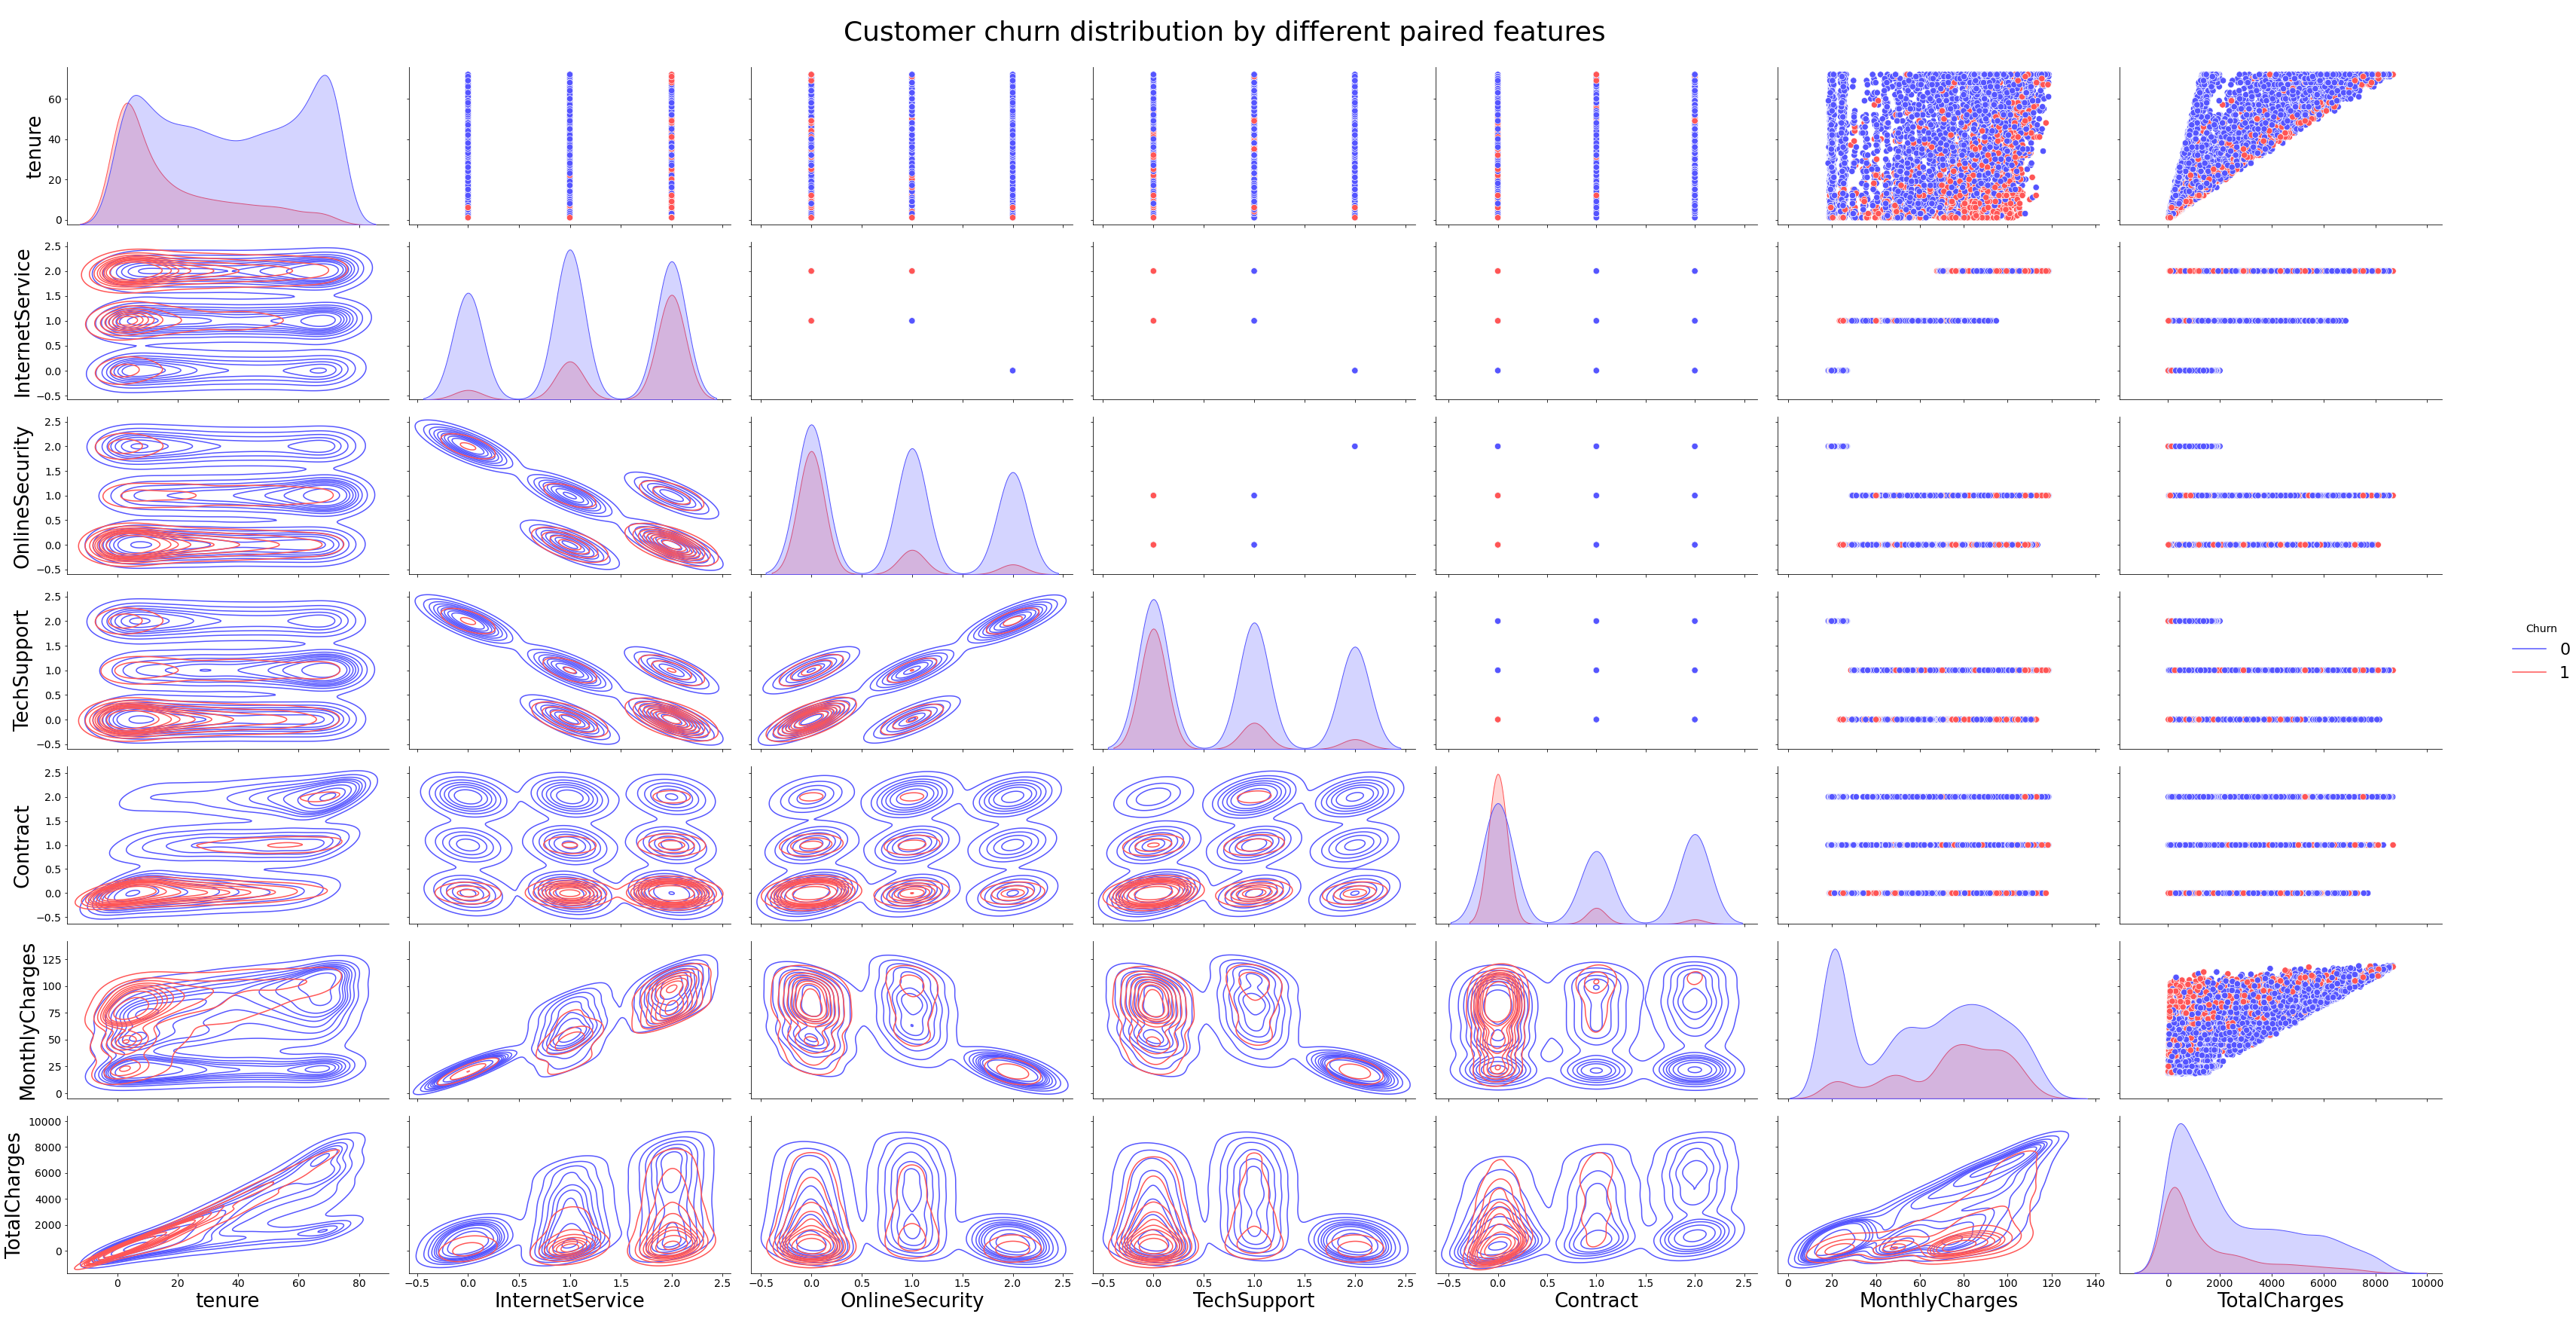

In [21]:
# paired scatter and kde plots between features

# axes label size
rc('axes', labelsize = 26)

# the most corr columns and columns with the charges
df_most_corr_charges = df[most_corr_columns.index]
df_most_corr_charges[['MonthlyCharges', 'TotalCharges', 'Churn']] = df[['MonthlyCharges', 'TotalCharges', 'Churn']]

# lower corner - paired kde plot, diag - kde plot, upper corner - scatter plot
g = sns.PairGrid(df_most_corr_charges, hue='Churn', palette='seismic', diag_sharey=False, height=3.5, aspect=1.8)
g.map_upper(sns.scatterplot, s=70)
g.map_diag(sns.kdeplot, shade=True)
g.map_lower(sns.kdeplot)

# plot formatting
g.add_legend(fontsize=22, title_fontsize=22)
g.legend.set_bbox_to_anchor([1.05, 0.5])
g.axes[0][0].set_title('\n\n\n')
g.fig.suptitle('Customer churn distribution by different paired features', size=36)
plt.tight_layout()

# back to 14 size of axes labels
rc('axes', labelsize = 14)

**Correlation conclusions**
* It is clear from the graph that most of the customers leaving the company are concentrated where the values of the columns "Contract", "TechSupport", "OnlineSecurity" take zero values (No), as well as where "tenure" does not exceed 12 months, and "InternetService" is equal to two (Fiber optic);
* In no case of considering pairs of features it is possible to separate one class from another precisely. The most successful pairs of features, at certain values, only equalize the number of objects of classes 1 and 0, which will have a bad effect on the accuracy of the model;
* The zero value of the "Contract" column allows you to cover the largest number of objects of the first class, in the future it is necessary to push from this;
* The best combinations of pairs, at first glance, are Contract-tenure, tenure-InternetService, Contract-InternetService, Contract-OnlineSecurity, Contract-TechSupport, InternetService-MonthlyCharges;
* It is necessary to identify only the most general rules (a small depth for training models) for separating 1 and 0 classes, otherwise, having piled dozens of conditions, you can greatly get overfitted.

## Hypotheses

**Main hypotheses**
1. Too high charges (MonthlyCharges>60) for those customers who are using optic (InternetService=="Fiber optic"==2) cable making them leave (about 40% clients that are using optic cable had departed);
2. MonthlyCharges and InternetService features may be combined;
3. As the time running customers getting used to the company more and more and the monthly charges doesn't already affect so much to the people who have impressive tenure (tenure>?);
4. Services connection like TechSupport and OnlineSecurity and signing one year or two year contracts are just reflection of solid customer's intention to remain in the company. Customers who signed two year contracts (Contract="Two year") more like to have remained but we still have to lead him to sign it using some influence levers (discounts or something). So if the client choosing Month-to-month (Contract="Month-to-month") contract - he is not sure yet wants he to leave or to remain.

**Reasons for forming hypotheses**
1. InternetService affects to MonthlyCharges so hard that the most majority of ppl who leaving the company have a fiber optic cable and they are paying much more money in average than those who have the DSL or who have't internet service at all;
2.  Correlation coeff between MonthlyCharges and InternetService features is 0.9;
3. If you look at the graph tenure-MonthlyCharges you will see that the customer's charges as more higher as tenure more higher but the share of people who are leaving the company getting lower;
4. Customers who have some service (TechSupport or OnlineSecurity) connected or signed one/two year contract more likely to have remained. As an example, when InternetService is connected it leads the customer to leave the company, so in that case connected service is the reason of churn.

## Hypotheses justification

In [22]:
# ceil every value in pd.Interval
def IntervalIndex_ceil(data):
    intervals = []
    for interval in data:
        interval = interval.left, interval.right

        interval_rnd = np.ceil(interval).astype(int)
        interval_rnd = pd.Interval(*interval_rnd, closed=data.closed)
        intervals.append(interval_rnd)
    return pd.IntervalIndex(intervals, closed=data.closed)

In [23]:
# assign new column "bin" with n binned intervals. Values are being taken from pandas index.
def auto_bin(self, df, bins_num=10):
    self.df_bin = df.copy()
    min_val = df.index.min()
    max_val = df.index.max()
    bins = pd.interval_range(min_val-1, max_val, bins_num)
    bins = IntervalIndex_ceil(bins)
    self.df_bin['bin'] = pd.DataFrame(pd.cut(df.index, bins)).values
    
    return self

In [24]:
# split months into periods of 7 months
df['tenure_bin'] = auto_bin(auto_bin, df[['tenure']].set_index('tenure')).df_bin.bin.values

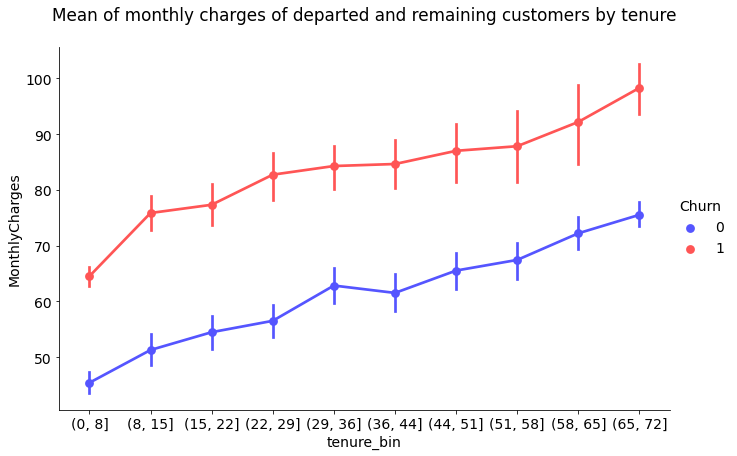

In [25]:
# mean of MonthlyCharges in each period for departed and remaining clients
fd = sns.FacetGrid(df.sort_values('tenure_bin'), size=6, aspect=1.6)
fd.map(sns.pointplot, 'tenure_bin', 'MonthlyCharges', 'Churn', palette='seismic').add_legend(title='Churn')

# plot formatting
plt.title('Mean of monthly charges of departed and remaining customers by tenure\n')
plt.show()

**The influence of price**<br>
        The departed customers really paying more than the remaining customers (for departed customers a mean of MonthlyCharges always higher than 60) .

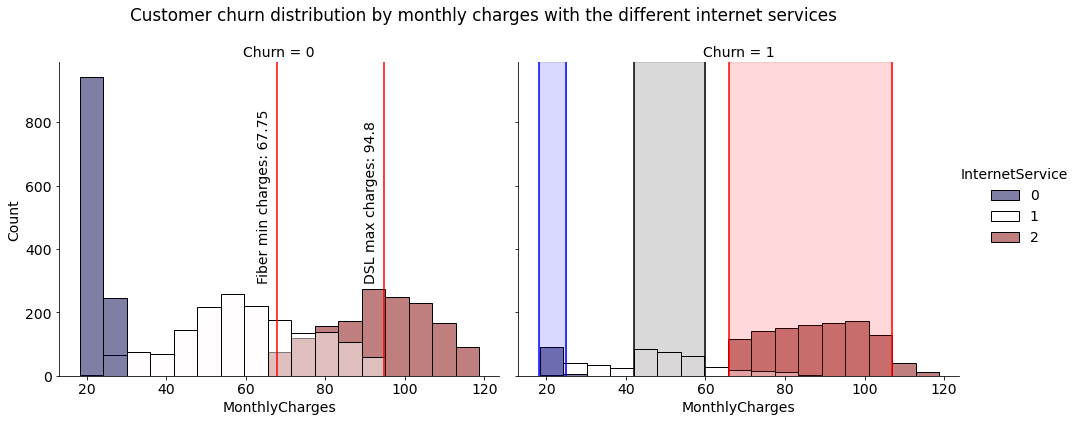

In [26]:
# monthly charges departed and remaining customers within different price segments
dis = sns.displot(data=df, x='MonthlyCharges', hue='InternetService', col='Churn', kind='hist', palette='seismic', height=6)
fiber_charg_min = df[df.InternetService == 2].MonthlyCharges.min()
dsl_charg_max = df[df.InternetService == 1].MonthlyCharges.max()

# annotations
dis.axes[0][0].annotate(f'Fiber min charges: {fiber_charg_min}', [fiber_charg_min-5, 300], rotation=90)
dis.axes[0][0].annotate(f'DSL max charges: {dsl_charg_max}', [dsl_charg_max-5, 300], rotation=90)

# min and max of overlap interval
dis.axes[0][0].axvline(fiber_charg_min, color='red')
dis.axes[0][0].axvline(dsl_charg_max, color='red')

# intervals with the highest share of churn
dis.axes[0][1].axvline(18, color='b')
dis.axes[0][1].axvline(25, color='b')
dis.axes[0][1].axvspan(18, 25, color='b', alpha=0.15)

dis.axes[0][1].axvline(42, color='black')
dis.axes[0][1].axvline(60, color='black')
dis.axes[0][1].axvspan(42, 60, color='black', alpha=0.15)

dis.axes[0][1].axvline(66, color='r')
dis.axes[0][1].axvline(107, color='r')
dis.axes[0][1].axvspan(66, 107, color='r', alpha=0.15)

# plot formatting
dis.legend.set_bbox_to_anchor([1.1, 0.5])
dis.axes[0][0].title._text = '\n\n' + dis.axes[0][0].title._text
dis.fig.suptitle('Customer churn distribution by monthly charges with the different internet services')
dis.fig.tight_layout()

**Separating**
* Customers who are paying more than 60 (67.75 actually) are mosly those who are using a Fiber optic (InternetService==2) but there is an interval from 67 to 95 when it isn't - it's the  clients who are using DSL;
* Because of this interval we CAN NOT just say that "vast majority of leaving customers are the people who are paying more than 67 every month" because in this case we will cover many of the remaining customers who use DSL **BUT** if we say "Departed customers are the people who are using Fiber optic" it will be a better way to separate leaving and remaining clients;
* To get maximum of precision it is necesssary to consider highlighted areas at the second figure (Churn = 1). To do this, it necessary to separate fiber optic (InternetService==2) and DSL (InternetService==1) gropus using MonthlyCharges (the interval from 67 to 95 prevents to do it). If multiply MonthlyCharges and InternetService it looks like it will work.

**Price segments**
* So we have 3 price segments: *low-cost* with no Internet (InternetService==0), *medium-cost* with DSL (InternetService==1) and *high-cost* with fiber optic (InternetService==2);
* As the price segment becomes higher the share of departed customers becomes higher too. Due to the fact that the most of people leave the company from the high-cost segment being dissatisfied by him, departed customers pay more per month in average.

**First hypothes - APPROVED** <br>
* As we can see it's really the vast majority of people leaving the company with the monthly charges higher than 67.75 and almost all of them have InternetService with a fiber optic cable (InternetService==2);
* High-cost segment gives the best precision and recall when looking for departed (Churn = 1) customers.

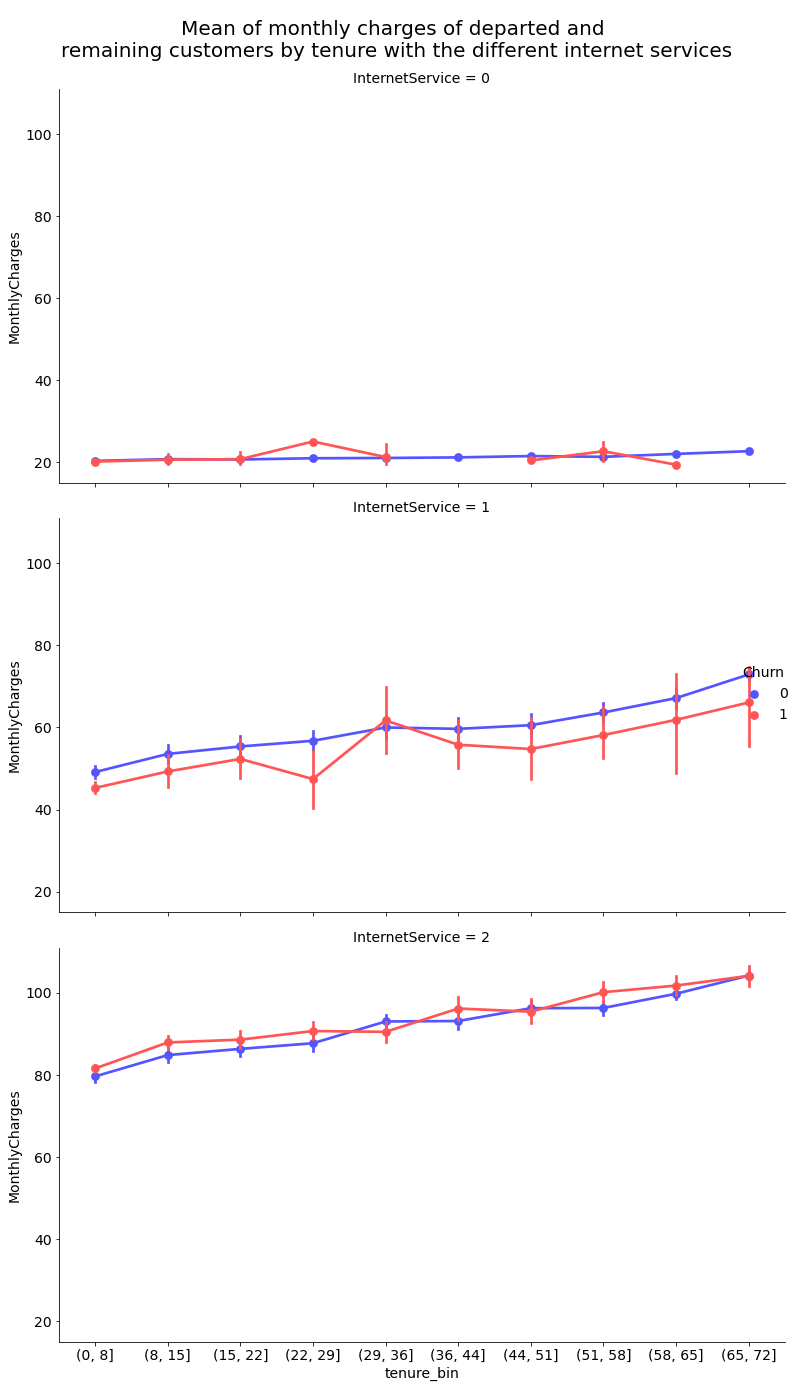

In [27]:
# mean of MonthlyCharges in each period for departed and remaining clients within price segments
fd = sns.FacetGrid(df.sort_values('tenure_bin'), row='InternetService', size=6.5, aspect=1.6)
fd.map(sns.pointplot, 'tenure_bin', 'MonthlyCharges', 'Churn', palette='seismic').add_legend(title='Churn')
# plot formatting
fd.axes[0][0].title._text = '\n\n\n\n' + fd.axes[0][0].title._text
fd.fig.suptitle('Mean of monthly charges of departed and \nremaining customers by tenure with the different internet services\n\n', size=20)
fd.fig.tight_layout()

**Monthly Charges within the price segments**
* Monthly charges getting higher over the time within each segment but for those who have no internet service this effect is weak;
* In each period, the average monthly charges is almost the same for both of the departed and the remaining customers. It means that the share of departed customers doesn't depend on MonthlyCharges within of one price segment. Only very transition from one price segment to another affects to the share of departed customers. In other words, the price of the segment as a whole has an impact.

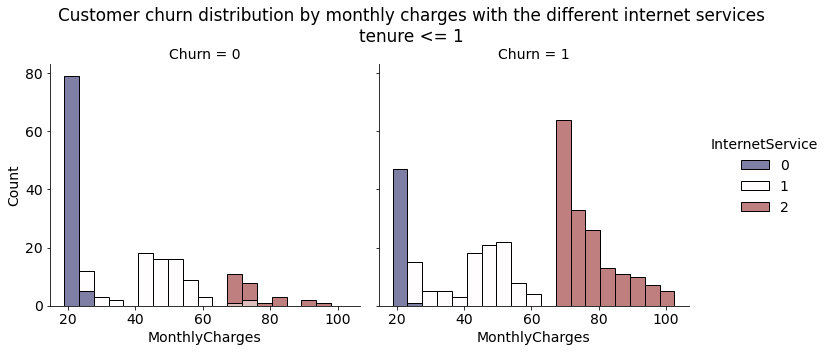

In [28]:
# monthly charges departed and remaining customers within different price segments before certain month

# before this month including himself
tenure = 1

# displot
dis = sns.displot(data=df[df.tenure <= tenure], x='MonthlyCharges', hue='InternetService', col='Churn', kind='hist', palette='seismic', bins=19)

# plot formatting
dis.axes[0][0].title._text = '\n\n' + dis.axes[0][0].title._text
dis.fig.suptitle(f'Customer churn distribution by monthly charges with the different internet services\ntenure <= {tenure}')
dis.tight_layout()

This overlap in interval from 67 to 95 occurs because over time people pay more and those who have DSL Internet with the large tenure pay the same as those who have just connected a fiber optic. So if we look at the figure above with a low tenure we can see that overlap had almost vanished. Plus, the average monthly charges of those who use DSL with a large tenure is comparable to those who use a fiber optic and have just connected, which proves the above mentioned once again.

**Feature engineering**<br>
        Instead of using many rules like "if (InternetService==2 & MonthlyCharges > 67 & MonthlyCharges < 107) | (InternetService==1..." there is the way to use MonthlyCharges and InternetService as one feature by multiplying them if we change InternetService values from 0, 1, and 2 to 1,2 and 3 to not loose the information.

In [29]:
# creating new "IS*MC" feature which is multiplying of InternetService and MonthlyCharges columns
df['IS*MC'] = df['InternetService'].map({0: 1, 1:2, 2:3}) * df['MonthlyCharges']

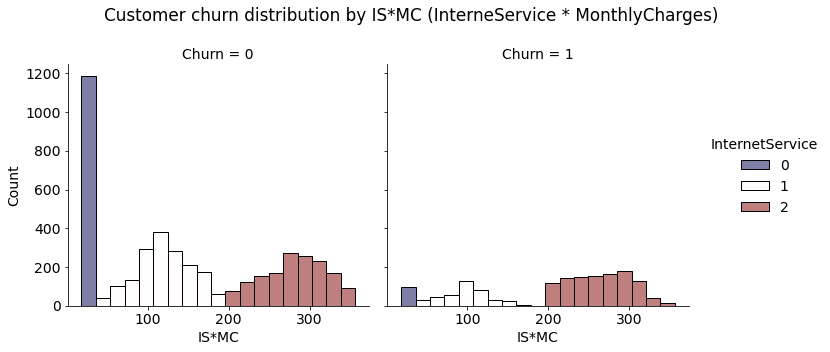

In [30]:
# IS*MC departed and remaining customers within different price segments
dis = sns.displot(data=df, x='IS*MC', hue='InternetService', col='Churn', kind='hist', palette='seismic', bins=19)

# plot formatting
dis.axes[0][0].title._text = '\n\n' + dis.axes[0][0].title._text
dis.fig.suptitle(f'Customer churn distribution by IS*MC (InterneService * MonthlyCharges)')
dis.tight_layout()

**Separating**<br>
        Now we can select specific intervals of the price segments in a simpler way with no side effects (like overlapping that makes precision worse).

**Second hypothes - APPROVED** <br>
* Combined feature has been created clearly with no overlapping;
* One combined feature instead of two allows to increase the performance and separate departed and remaining customers using fewer rules.

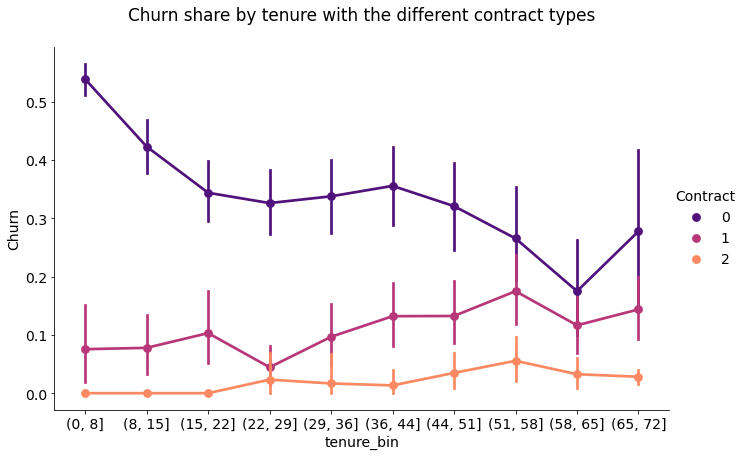

In [31]:
# share of departed customers in each period with different contract types
fd = sns.FacetGrid(df.sort_values('tenure_bin'), size=6, aspect=1.6)
fd.map(sns.pointplot, 'tenure_bin', 'Churn', 'Contract', palette='magma').add_legend(title='Contract')

# plot formatting
fd.axes[0][0].title._text = '\n\n' + fd.axes[0][0].title._text
plt.title('Churn share by tenure with the different contract types\n')
plt.show()

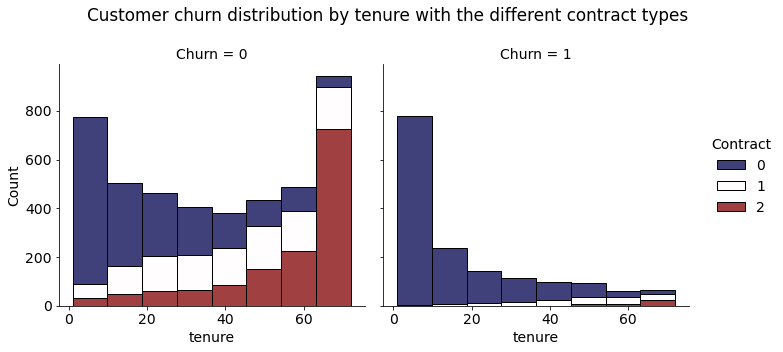

In [32]:
# the change of share of departing customers with the time running
dis = sns.displot(data=df, x='tenure', hue='Contract', col='Churn', kind='hist', palette='seismic', multiple='stack', bins=8)

# plot formatting
dis.axes[0][0].title._text = '\n\n' + dis.axes[0][0].title._text
dis.fig.suptitle('Customer churn distribution by tenure with the different contract types')
dis.tight_layout()

**The influence of time**<br>
* Over the time, customers with a month-to-month contract leave the company less and less, but the real reason is that there almost no one left to depart from this group;
* Clients with a one and two year contract behave another, over the time the share of departing customers becomes higher but their quantity still very small compared with the remaining customers;
* After a long time (tenure > 60) the vast majority of remaining customets have two year contracts;
* The main task is to not lose the customers who have month-to-month contract. The most efficient way to do it is to try to lead them to sign two-year contract otherwise they will run away anyway.

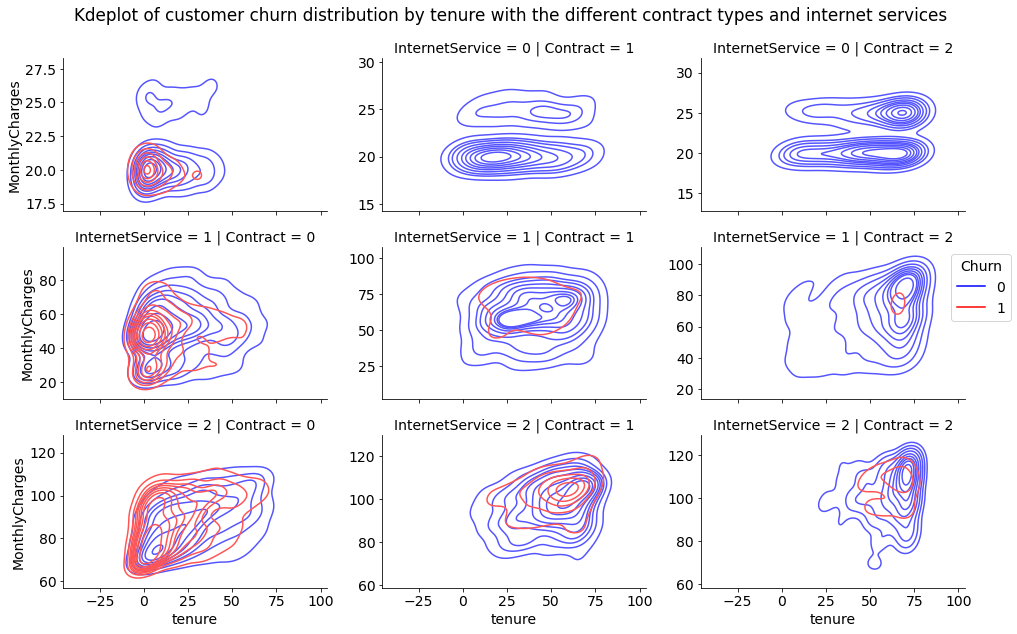

In [33]:
# the share of customers with different combinations of InternetService and Contract
fd = sns.FacetGrid(df, col='Contract', row='InternetService', size=3, aspect=1.6, sharey=False)
fd.map(sns.kdeplot, 'tenure', 'MonthlyCharges', hue=df['Churn'], palette='seismic', legend=True)

# plot formatting
handles = lines.Line2D([None], [None], color='blue'),\
    lines.Line2D([None], [None], color='red')
fd.axes[1][2].legend(handles, [0, 1], title='Churn', bbox_to_anchor=(1.2, 1))
fd.axes[0][0].title._text = '\n\n'
fd.fig.suptitle('Kdeplot of customer churn distribution by tenure with the different contract types and internet services')
fd.fig.tight_layout()

In the first months, MonthlyCharges does not affect to the share of leaving customers, because the distribution there is even, but when the tenure becomes more than 30 and monthly charges more than 60 (in average), it starts to affect to the share of leaving customers, even those who have a two year contract start to leave.

**Third hypothes - BUSTED**
* The share of those who leave the company after many months becomes fewer because by that time almost no one left of customers who have signed a month-to-month contract - and they are exactly who are leaving the company. So it's happening not because the customers getting used to the company - just almost all the clients with the month-to-month contract are already departed;
* The customers with the very begin are already sure about want they remain for a long time (and they are signing two or one year contract) or to take a closer look (and they are signing month-to-month contract). The latter, almost all leave the company within 4 years;
* The monthly charges inevitably grows within the price segment, and when it becomes more than the critical mark (depending on the Internet service and the contract), those who have a one and two year contracts starting to leave the company too. This may be a problem very soon, but there are very few of them at the moment;
* The most resistant customers are those with one year and two year contracts and no internet connection. No wonder, because the price for their segment hardly grows over time.

**Alternative conclusion**<br>
        In the first 4 years almost all the customers who had a month-to-month contract leave. After this moment, people with a one-year and two-year contracts start to leave, and soon this may become a problem.

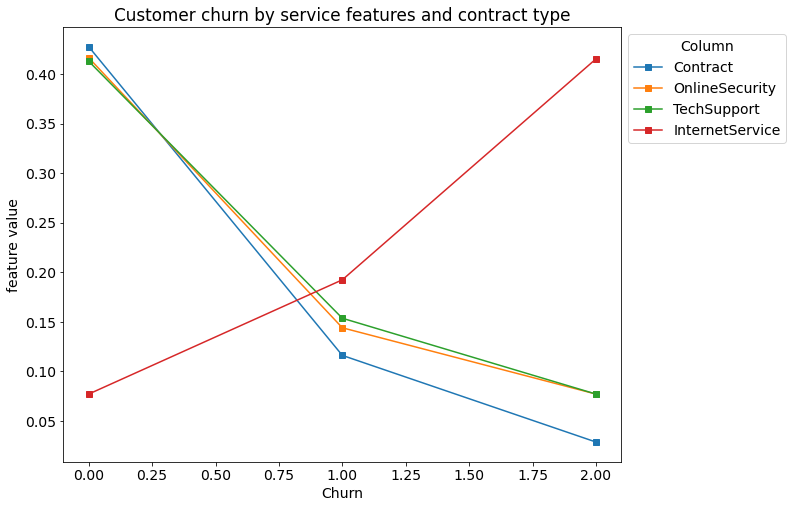

In [34]:
# plotting mean of Churn by a feature
def plot_mean(df, *cols, col_func='Churn'):
    for col in cols:
        plt.plot(df.groupby(col)[col_func].mean().index, 
                 df.groupby(col)[col_func].mean(), marker='s')

cols = ['Contract', 'OnlineSecurity', 'TechSupport', 'InternetService']
plot_mean(df, *cols)

# plot formatting
plt.title('Customer churn by service features and contract type')
plt.xlabel('Churn')
plt.ylabel('feature value')
plt.legend(cols, bbox_to_anchor=(1, 1), title='Column')
plt.show()

**Customer's intentions**
* If you look at the InternetService line, you can see that it is the connected service (DSL and Fiber optic) that makes people leave - the reason is in the service itself (quality or cost), and when the service is disabled, fewer people leave;
* Unlike the InternetService line, in all other cases, it is the lack of online security, tech support service or longer-term contract is the reason for leaving - that is, there are no problems with the service itself and this is cannot be the reason of churn. It means that those who connect one of this services (or conclude a longer-term contract) are simply tuned in to a longer-term cooperation - this shows the client's intention to stay with the company longer;
* The unsurest customers (those who we are searching for) are those who have a month-to-month contract, and not a single service is connected, provided they have the Internet. 

**Fourth hypothes - APPROVED**
* The customers who have one or two year contracts (Contract==1 | Contract==2), connected tech support (TechSupport==1) and online security(OnlineSecurity==1) services are more sure about they want to a long-term cooperation with the company;
* This can be used to improve the precision of searching for departed customers, so the highest value may be achieved when Contract==0 & OnlineSecurity==0 & TechSupport==0 & InternetService==2;
* Those who have TechSupport==2 and OnlineSecurity=2 (no internet service) satisfied with the pricing policy, so the share of departed customers there is so little.

<font size=4>**Let's try to reveal more complicated rules (combinations of more than two features), which will allow to separate 1 and 0 classes from each other better.**

**What do we know (about searching of leaving customers)**
* We may use "IS*MC" column to take into consideration InternetService and MonthlyCharges together with no without quality degradation;
* The rule Contract=0 gives the highest precision and recall - it should be used;
* Tenure affects hard to the share of leaving customers who signed Contract=0 (month-to-month);
* We may also use the features OnlineSecurity=0 and TechSupport=0 to get a better precision but it may to decrease a recall.

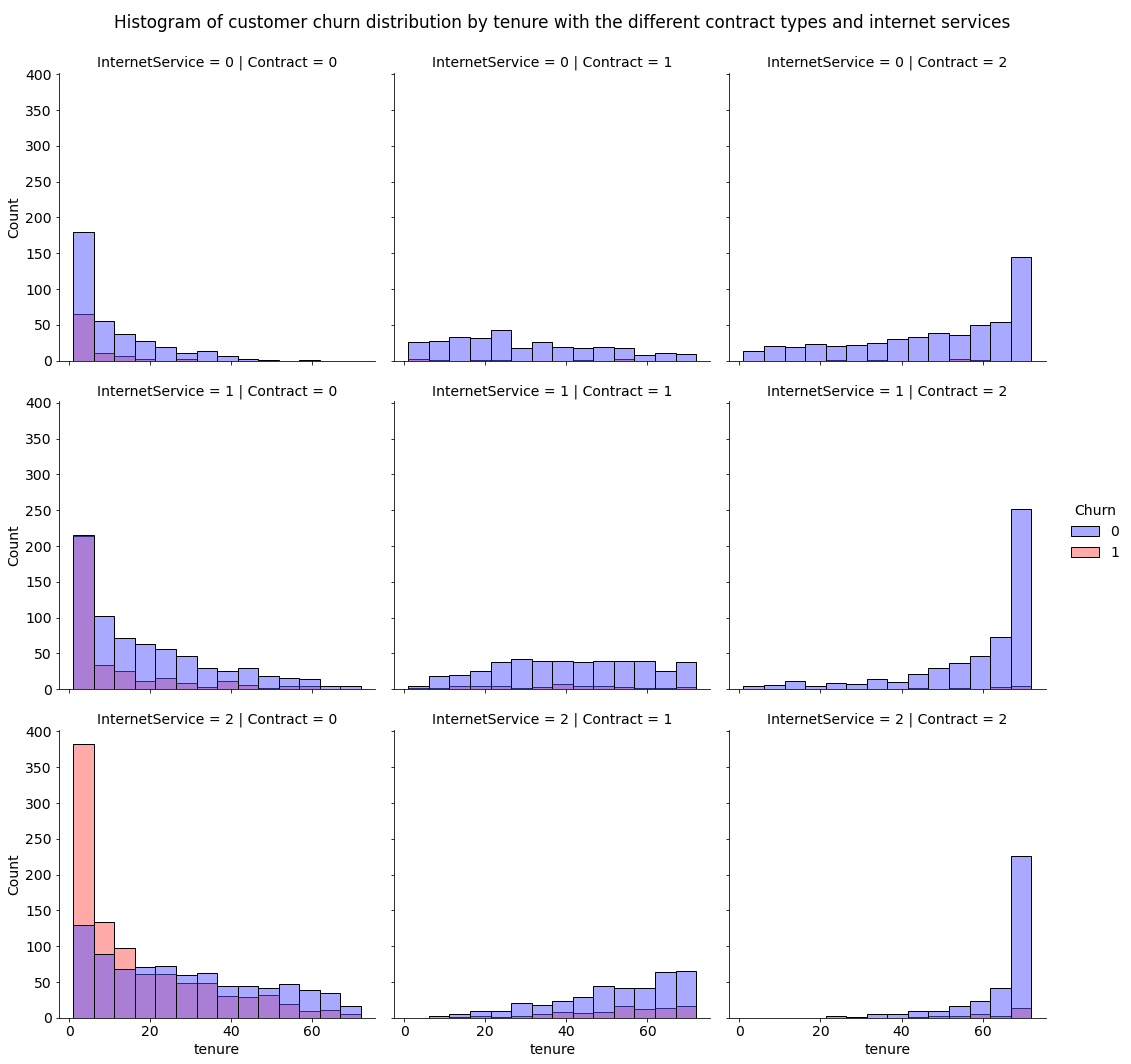

In [35]:
# Churn distribution at different value combinations of three features
dis = sns.displot(data=df, x='tenure', hue='Churn',  row='InternetService', col='Contract', kind='hist', palette='seismic')

# plot formatting
dis.axes[0][0].title._text = '\n\n\n' + dis.axes[0][0].title._text
dis.fig.suptitle('Histogram of customer churn distribution by tenure with the different contract types and internet services')
dis.tight_layout()

Consider this distributions using scatter plot.

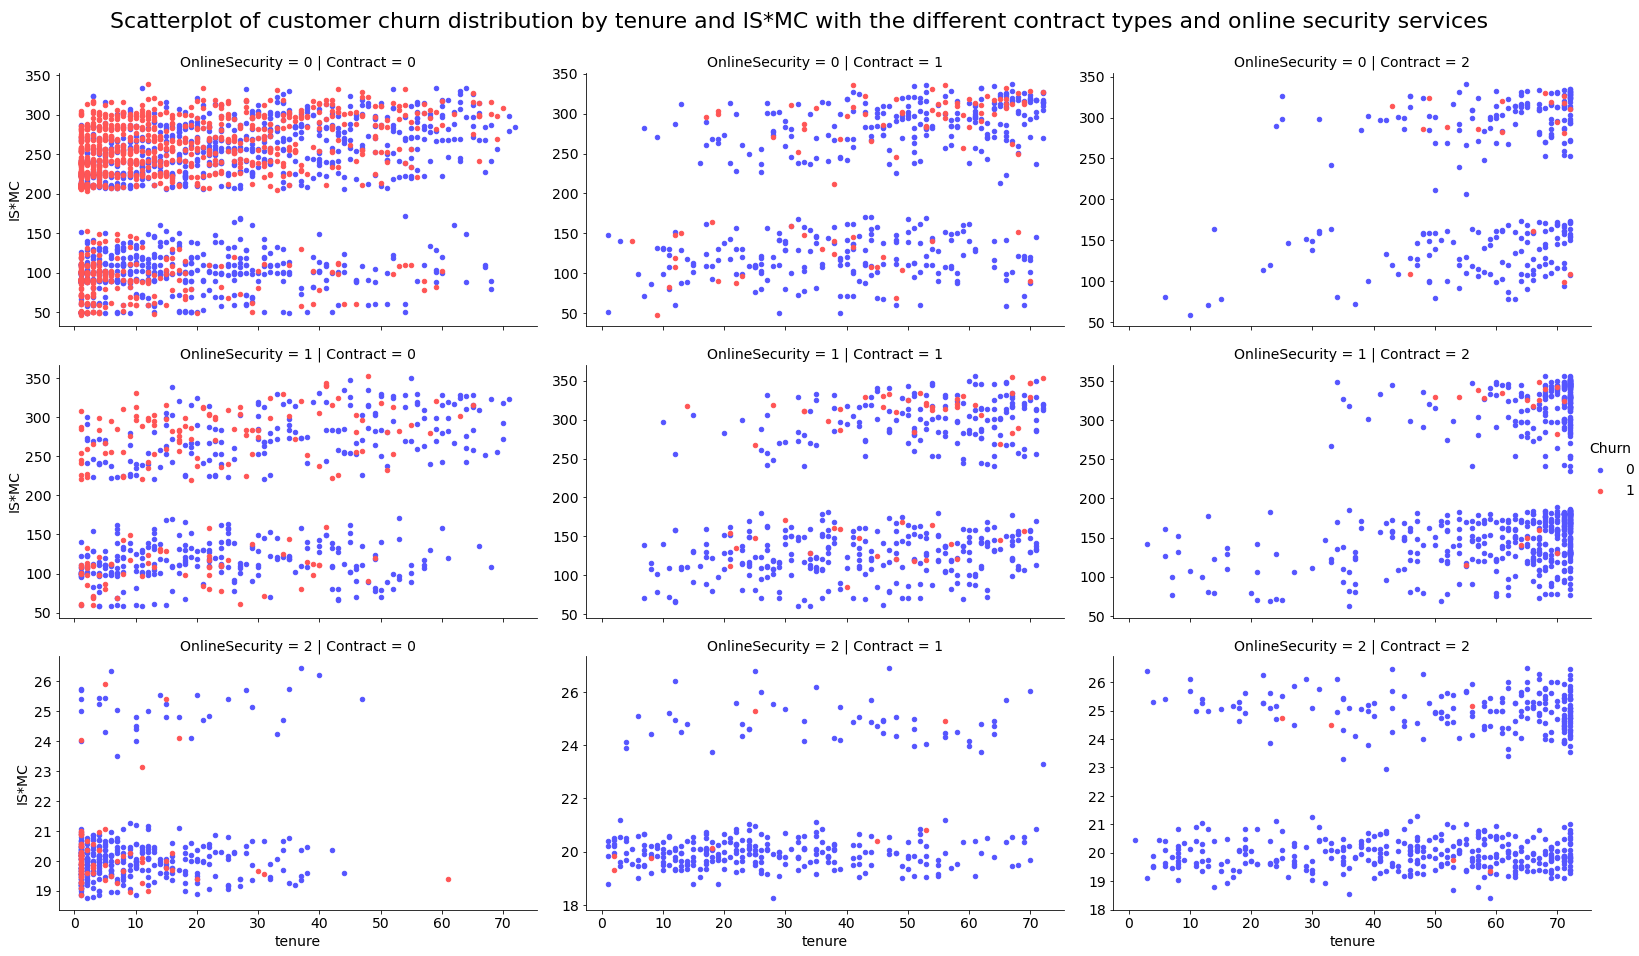

In [36]:
# visual definition of the group with a high probability to have a churn.


# FacetGrid of scatter plots
fd = sns.FacetGrid(df,  hue='Churn', col='Contract', row='OnlineSecurity', size=4.5, aspect=1.6, palette='seismic', sharey=False)
fd.map(plt.scatter, "tenure", "IS*MC", s=20).add_legend()

# plot formatting
fd.legend.set_bbox_to_anchor([1.02, 0.5])
fd.axes[0][0].title._text = '\n\n\n' + fd.axes[0][0].title._text
fd.fig.suptitle('Scatterplot of customer churn distribution by tenure and IS*MC with the different contract types and online security services', size=22)
fd.fig.tight_layout()

**Feature importances**
* The most important feature is "Contract";
* The second feature on importance is "InternetService" which may be combined with "MonthlyCharges" to become "IS*MC" feature;
* The third feature on importance is "tenure";
* Using OnlineSecurity and TechSupport features already looks like unnecessary;
* We may use more features and rules to but this is overfitting.

**The classification rules to define the group with a high probability to have a churn**<br>
    There is the optimum common rules we can use to define the group with a high probability of churn.
* Contract==0 & IS*MC > 200 & tenure < 55;
* Contract==0 & (40 < IS*MC < 150) & tenure < 7;
* Contract==0 & IS*MC < 22 & tenure < 2.

In [37]:
# rules to apply to dataset to reveal the group with a high probability to have a churn
rules = ((df['Contract'] == 0) & (df['IS*MC'] > 200) & (df['tenure'] < 55) ) | \
           ((df['Contract'] == 0) & (df['IS*MC'] < 150) & (df['IS*MC'] > 40) & (df['tenure'] < 7) ) | \
           ((df['Contract'] == 0) & (df['IS*MC'] < 22) & (df['tenure'] < 2))

# applying the classification rules to dataset
df_rules = df[rules]

# count the precision, recall and f1 score
rules_cnt = df_rules.Churn.value_counts().sort_index(ascending=False)
a = (rules_cnt[1] + len(df[df.Churn == 0]) - rules_cnt[0]) / len(df)
p = rules_cnt[1]/(rules_cnt[1] + rules_cnt[0])
r = rules_cnt[1] / len(df[df.Churn == 1])
f1_score_ = 2*p*r / (p + r)
print(f'accuracy: {a}\nprecision: {p}\nrecall: {r}\nf1_score: {f1_score_}')

accuracy: 0.7687416331994645
precision: 0.5468250342622202
recall: 0.7542533081285444
f1_score: 0.6340042372881356


So using this common classification rules the best we can do is to designate the group with 75% of departed customers but we will have to cover almost the same number of remaining customers and mark them as the potential leaving customers too. The vast majority of this group is the customers who signed month-to-month contract and using fiber optic internet service.

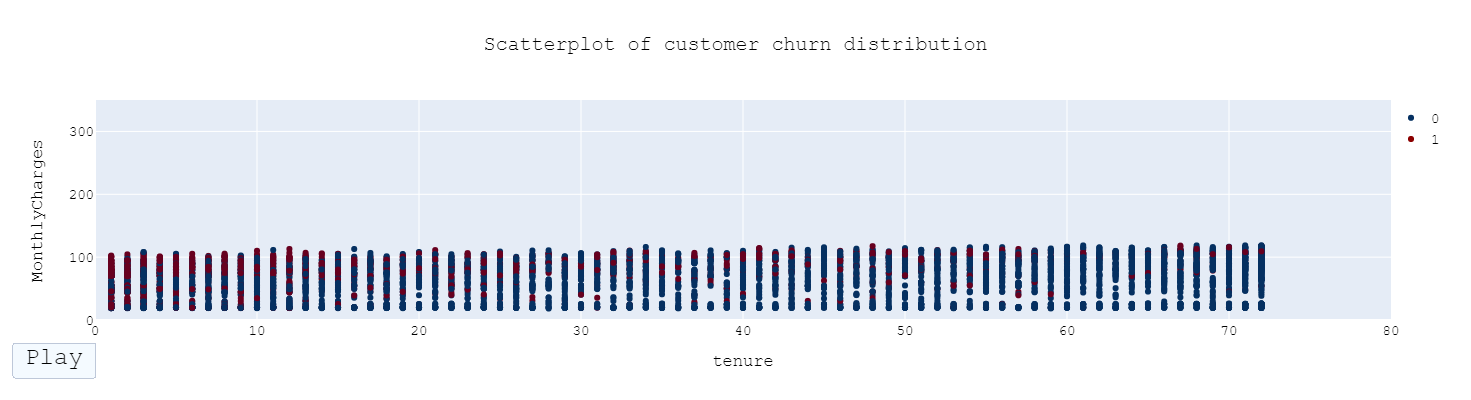

In [38]:
# animation of applying the rules. Process of revealing the group with a high probability to have a churn
import plotly.graph_objects as go

# frame 1 - initial dataset
frame_1 = go.Frame(data=go.Scatter(x=df['tenure'], y=df['MonthlyCharges'], marker=dict(color=df['Churn'])), 
                     layout=go.Layout(title_text="Applying the classification rules", yaxis_title="MonthlyCharges"))

# frame 2 - create new feature IS*MC
frame_2 = go.Frame(data=go.Scatter(x=df['tenure'], y=df['IS*MC'], marker=dict(color=df['Churn'])), layout=go.Layout(yaxis_title="IS*MC"))

# frame 3 - customers who have month-to-month contract only
df_3 = df[df['Contract'] == 0]
frame_3= go.Frame(data=go.Scatter(x=df_3['tenure'], y=df_3['IS*MC'], marker=dict(color=df_3['Churn'])))

# frame 4 - customers who have month-to-month contract and certain IS*MC borders
df_4 = df[((df['Contract'] == 0) & (df['IS*MC'] > 200)) | \
           ((df['Contract'] == 0) & (df['IS*MC'] < 150) & (df['IS*MC'] > 40)) | \
           ((df['Contract'] == 0) & (df['IS*MC'] < 22))]
frame_4= go.Frame(data=go.Scatter(x=df_4['tenure'], y=df_4['IS*MC'], marker=dict(color=df_4['Churn'])))

# frame 5 - all the rules have been applied
df_5 = df[rules]
frame_5= go.Frame(data=go.Scatter(x=df_5['tenure'], y=df_5['IS*MC'], marker=dict(color=df_5['Churn'])), 
                     layout=go.Layout(title_text="Target group (high prob to have a churn)"))

# creating layout and button
fig = go.Figure(
    data=[go.Scatter(x=df['tenure'], y=df['MonthlyCharges'], 
                     mode='markers', name='0', showlegend=True, 
                     marker=dict(color=df['Churn'], colorscale='RdBu_r')),
          
         go.Scatter(x=[None], y=[None],  mode='markers',
                       marker=dict(color='darkred'),
                       showlegend=True, name='1')],
    layout=go.Layout(
        width=600, height=400,
        xaxis=dict(range=[0, 80], autorange=False),
        yaxis=dict(range=[0, 350], autorange=False),
        title="Scatterplot of customer churn distribution",
        title_x=0.5,
        updatemenus=[dict(
            type="buttons",
            y=-0.1,
            x=0.,
            font=dict(size=24),
            buttons=[dict(label="Play", method="animate", args=[None])])]
    ),
    frames=[frame_1, frame_2, frame_3, frame_4, frame_5]
)

# plot formatting
fig.update_layout(
    xaxis_title="tenure",
    yaxis_title="MonthlyCharges",
    font=dict(
        family="Courier New, monospace",
        size=14,
        color="Black"
    ),
    legend=dict(
        yanchor="top",
        y=0.99,
        xanchor="left",
        x=1
    ),
    annotations=[
        dict(
            x=1.13,
            y=1.06,
            xref='paper',
            yref='paper',
            text='Churn',
            showarrow=False
        )
    ]
)

fig.show()

## Identifying the feature importances using Ensemble Methods

In [39]:
# data transform, split to training and testing datasets and calc the feature importances
X_raw = df.drop(['Churn', 'IS*MC', 'tenure_bin'], axis=1)
y = df.loc[:, 'Churn']
# xgboost classifier object definition
xgb_raw = XGBClassifier(objective='binary:logistic', eval_metric='logloss').fit(X_raw, y)
# RandomForest classifier object definition
rf_raw = RandomForestClassifier(random_state=0).fit(X_raw, y)
# AdaBoost classifier object definition
ada_raw = AdaBoostClassifier(random_state=0).fit(X_raw, y)
# GradientBoosting classifier object definition
gb_raw = GradientBoostingClassifier(random_state=0).fit(X_raw, y)
# ExtraTrees classifier object definition
et_raw = ExtraTreesClassifier(random_state=0).fit(X_raw, y)

# mean of the feature importances of the models
feat_imp = np.c_[xgb_raw.feature_importances_, 
                 rf_raw.feature_importances_, 
                 ada_raw.feature_importances_, 
                 gb_raw.feature_importances_, 
                 et_raw.feature_importances_].mean(axis=1)

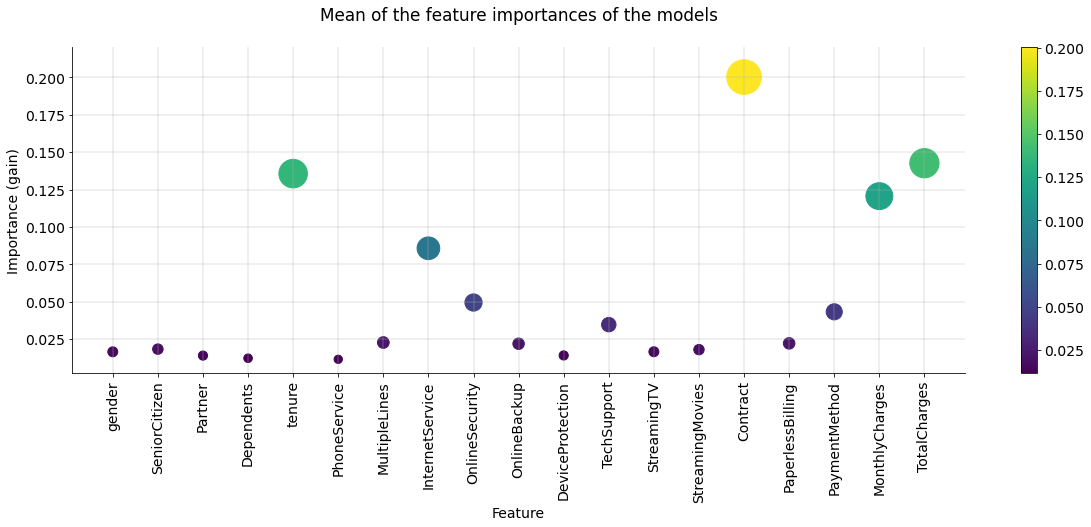

In [40]:
# mean of the feature importances of the models
plt.figure(figsize=(20,6))
ax = plt.axes()
scatter = plt.scatter(x=X_raw.columns, y=feat_imp, c=feat_imp, cmap=cm.viridis, s=6000*feat_imp, marker='o')

# plot formatting
plt.title('Mean of the feature importances of the models\n')
ax.tick_params(axis='x', rotation=90)
plt.ylabel('Importance (gain)')
plt.xlabel('Feature')
plt.axis(ymax=ax.get_ylim()[1] * 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=.2, lw=2)
plt.colorbar()
plt.show()

**Feature importances**<br><br>
There are 5 the most important features. The results are very similar to those which have been found during the EDA.
* Contract;
* TotalCharges;
* tenure;

* $\text{IS*MC} 
\begin{cases} 
\text{MonthlyCharges} \\
\text{InternetService}  
\end{cases}$

# 3. Models building to predict a churn

**Justification of using the models**<br>
Departed and remaining clients cannot be separated precisely, we can only to designate the group with a high probability to have a churn. So there is no clear clusters. This cause we may be absolutely sure k neighbors classifier will be useless here. Several general classification rules usual make it possible to designate this group, so all the models using decision tree with a small depth may be useful. Use gradient descent just to get min of  Logistic regression and gaussian naive bayes may also set one generalized rule to separate departed and remaining customers. The most important thing is to select parameters of the models so as to make them generalized otherwise it'll be too easy to make them overfitted under training data.<br><br>
**Models list**
* XGBClassifier
* AdaBoostClassifier
* GradientBoostingClassifier
* RandomForestClassifier
* ExtraTreesClassifier
* DecisionTreeClassifier
* GaussianNB
* LogisticRegression

**Features**<br>
This work the most important features will be used only:
* Contract
* TotalCharges
* tenure
* IS*MC

In [78]:
# split dataset to train and test data

# get the most useful features
X = df[['Contract',  'tenure', 'IS*MC', 'TotalCharges']]#[['Contract', 'tenure', 'InternetService', 'MonthlyCharges', 'TotalCharges']]
y = df['Churn']

# split to training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2, test_size=0.2, stratify=y)

In [79]:
# initial parameters of models
# I've already put the best parameters after grid searching in initial parameters
xgb_params = {'objective': 'binary:logistic',
              'eval_metric': 'logloss',
              'use_label_encoder': False,
              'random_state': 0,
              'learning_rate': 0.30000000000000004,
              'max_depth': 1,
              'n_estimators': 60,
              'scale_pos_weight': 2.1282657452870217}

ada_params = {'random_state': 0, 'learning_rate': 0.1, 'n_estimators': 110}

gb_params = {'loss': 'exponential',
             'random_state': 0,
             'learning_rate': 0.1,
             'max_depth': 1,
             'n_estimators': 110}

rf_params = {'random_state': 0,
             'max_depth': 5,
             'n_estimators': 110,
             'class_weight': {1: 2.4000000000000004}}
et_params = {'random_state': 0,
             'max_depth': 7,
             'n_estimators': 160,
             'class_weight': {1: 2.700000000000001}}
dt_params = {'random_state': 0, 'max_depth': 4, 'class_weight': {1: 2.1000000000000005}}
gnb_params = {}
lr_params = {'random_state': 0}

meta_params = {'use_label_encoder': False,
               'random_state': 0,
               'objective': 'binary:logistic',
               'eval_metric': 'logloss',
               'learning_rate': 0.5000000000000001,
               'max_depth': 2,
               'n_estimators': 10,
               'scale_pos_weight': 1.627497334631252}

In [80]:
# the models definition
xgb = XGBClassifier(**xgb_params)
ada = AdaBoostClassifier(**ada_params)
gb = GradientBoostingClassifier(**gb_params)
rf = RandomForestClassifier(**rf_params)
et = ExtraTreesClassifier(**et_params)
dt = DecisionTreeClassifier(**dt_params)
gnb = GaussianNB(**gnb_params)
lr = LogisticRegression(**lr_params)

In [81]:
# the folds of data for cross-validation or cross-prediction
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

In [82]:
# if ON then launch grid searching otherwise not
GRID_SEARCH_MODE = 'OFF'

In [83]:
# setting grid search parameters

if GRID_SEARCH_MODE == 'ON':
    
    # grid params
    scale_pos_weight = y_train[y_train==0].size / y_train[y_train==1].size
    xgb_params_grid = {'n_estimators': np.arange(10, 170, 50), 
                       'max_depth': np.arange(1, 5, 1),
                       'scale_pos_weight': scale_pos_weight/np.arange(0.9, 1.8, 0.2),
                       'learning_rate': np.arange(0.1, 1, 0.2)
                      }

    ada_params_grid = {'n_estimators': np.arange(10, 220, 50),
                      'learning_rate': np.arange(0.1, 1, 0.2)
                      }

    gb_params_grid = {
                      'n_estimators': np.arange(10, 220, 50),
                      'learning_rate': np.arange(0.1, 1, 0.2),
                      'max_depth': np.arange(1, 8, 1)
                     }

    rf_params_grid = {'n_estimators': np.arange(10, 170, 50),
                      'max_depth': np.arange(1, 8, 1),
                      'class_weight': [{1: weight} for weight in np.arange(2, 4, 0.1)] + ['balanced']
                     }

    et_params_grid = {'n_estimators': np.arange(10, 170, 50),
                      'max_depth': np.arange(1, 8, 1),
                      'class_weight': [{1: weight} for weight in np.arange(1.5, 3, 0.1)] + ['balanced']
                     }

    dt_params_grid = {'max_depth': np.arange(1, 8, 1),
                      'class_weight': [{1: weight} for weight in np.arange(1.4, 3, 0.1)] + ['balanced']}
    gnb_params_grid = {}
    lr_params_grid = {'C': np.arange(0.1, 1.1, 0.1),
                      'class_weight': [{1: weight} for weight in np.arange(2, 3.5, 0.1)] + ['balanced']
                     }

    # count how many cycles of grid searching ahead
    def grid_cycles(*params_grid): 
        all_cycles = 0
        for i, model_param_grid in enumerate(params_grid):
            if len(model_param_grid):
                model_cycles = 1
            else:
                model_cycles = 0
            for label in model_param_grid:
                model_cycles *= len(model_param_grid[label])
            print(f'{i} model cycles: {model_cycles}')
            all_cycles += model_cycles
        print(f'cycles: {all_cycles}')

    grid_cycles(xgb_params_grid, ada_params_grid, gb_params_grid, rf_params_grid, et_params_grid, dt_params_grid, gnb_params_grid, lr_params_grid)

In [84]:
# Grid Search of the models parameters 

if GRID_SEARCH_MODE == 'ON':

    # the GridSearchCV objects with a grid-params definition
    xgb_grid = GridSearchCV(xgb, xgb_params_grid, 'roc_auc', cv=skf)
    ada_grid = GridSearchCV(ada, ada_params_grid, 'roc_auc', cv=skf)
    gb_grid = GridSearchCV(gb, gb_params_grid, 'roc_auc', cv=skf)
    rf_grid = GridSearchCV(rf, rf_params_grid, 'roc_auc', cv=skf)
    et_grid = GridSearchCV(et, et_params_grid, 'roc_auc', cv=skf)
    dt_grid = GridSearchCV(dt, dt_params_grid, 'roc_auc', cv=skf)
    gnb_grid = GridSearchCV(gnb, gnb_params_grid, 'roc_auc', cv=skf)
    lr_grid = GridSearchCV(lr, lr_params_grid, 'roc_auc', cv=skf)

    # fitting GridSearchCV objects to find the best params for the models
    xgb_grid.fit(X_train, y_train)
    ada_grid.fit(X_train, y_train)
    gb_grid.fit(X_train, y_train)
    rf_grid.fit(X_train, y_train)
    et_grid.fit(X_train, y_train)
    dt_grid.fit(X_train, y_train)
    gnb_grid.fit(X_train, y_train)
    lr_grid.fit(X_train, y_train)

    # cross-val scores of the models with the best params
    print('scores of the models with the best params: \n',
          xgb_grid.cv_results_['mean_test_score'].max(),
          ada_grid.cv_results_['mean_test_score'].max(),
          gb_grid.cv_results_['mean_test_score'].max(),
          rf_grid.cv_results_['mean_test_score'].max(),
          et_grid.cv_results_['mean_test_score'].max(),
          dt_grid.cv_results_['mean_test_score'].max(),
          gnb_grid.cv_results_['mean_test_score'].max(),
          lr_grid.cv_results_['mean_test_score'].max()
         )

    # combination initial params with the best gridded params
    xgb_params.update(xgb_grid.best_params_)
    ada_params.update(ada_grid.best_params_)
    gb_params.update(gb_grid.best_params_)
    rf_params.update(rf_grid.best_params_)
    et_params.update(et_grid.best_params_)
    dt_params.update(dt_grid.best_params_)
    gnb_params.update(gnb_grid.best_params_)
    lr_params.update(lr_grid.best_params_)

    # new exemplars of classes for models with the combination of the best and initial params
    xgb = XGBClassifier(**xgb_params)
    ada = AdaBoostClassifier(**ada_params)
    gb = GradientBoostingClassifier(**gb_params)
    rf = RandomForestClassifier(**rf_params)
    et = ExtraTreesClassifier(**et_params)
    dt = DecisionTreeClassifier(**dt_params)
    gnb = GaussianNB(**gnb_params)
    lr = LogisticRegression(**lr_params)

In [85]:
# lists of the models for stacking and their labels, meta alrorithm definition

# models list
models = [xgb, ada, gb, rf, et, dt, gnb, lr]

# metrics list
metrics = [roc_auc_score, confusion_matrix, 
    classification_report]

# models labels (for score)
model_labels = ['XGBClassifier', 'AdaBoostClassifier', 
                'GradientBoostingClassifier', 'RandomForestClassifier', 
                'ExtraTreesClassifier', 'DecisionTreeClassifier', 
                'GaussianNB', 'LogisticRegression']

# meta alg
meta_alg = XGBClassifier(**meta_params)

You may find the entire stacking class here - [STACKING](https://github.com/RuslanOraev/handmade-data-science/blob/main/my-own-library/ensemble_stacking.py)

In [86]:
# stacking algorithm definition
stc = Stacking(models, meta_alg, metrics=metrics, meta_weight=1, base_weight=1)
# fit the base models
stc.fit_base(X_train, y_train, fit_params={ada: {'sample_weight':y_train.apply(lambda x: 1 if x==0 else 1.3)},
                                           gb: {'sample_weight':y_train.apply(lambda x: 1 if x==0 else 1.3)}})

In [87]:
# grid search of the meta algorithm's params

if GRID_SEARCH_MODE == 'ON':

    # get the base predicts
    X_train_base = stc.predict_base(X_train)

    # fitting grid search of meta algorithm
    meta_grid = GridSearchCV(meta_alg, xgb_params_grid, 'roc_auc', cv=skf)
    meta_grid.fit(X_train_base, y_train)

    # updating meta algorithm params
    meta_params.update(meta_grid.best_params_)
    meta_alg = XGBClassifier(**meta_params)

In [88]:
# fit meta algorithm
stc.meta_alg = meta_alg
stc.fit_meta(X_train, y_train)

# 4. Models quality comparison

## Base models

### Train data

In [89]:
# get base models scorev
stc_base_score = stc.score_base(X_train, y_train, model_labels, print_scores=True)


****************************************************
                   XGBClassifier
****************************************************
--------------------------
roc_auc_score:
0.842766255957018
--------------------------
confusion_matrix:
[[2662  849]
 [ 293  976]]
--------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      3511
           1       0.53      0.77      0.63      1269

    accuracy                           0.76      4780
   macro avg       0.72      0.76      0.73      4780
weighted avg       0.80      0.76      0.77      4780

--------------------------

****************************************************
                 AdaBoostClassifier
****************************************************
--------------------------
roc_auc_score:
0.8410981898834665
--------------------------
confusion_matrix:
[[3083  428]
 [ 552  717]]
--------------------------
classification_report

### Test data

In [90]:
# get base models scorev
stc_base_score = stc.score_base(X_test, y_test, model_labels, print_scores=True)


****************************************************
                   XGBClassifier
****************************************************
--------------------------
roc_auc_score:
0.8406237016661653
--------------------------
confusion_matrix:
[[675 203]
 [ 78 240]]
--------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       878
           1       0.54      0.75      0.63       318

    accuracy                           0.77      1196
   macro avg       0.72      0.76      0.73      1196
weighted avg       0.80      0.77      0.78      1196

--------------------------

****************************************************
                 AdaBoostClassifier
****************************************************
--------------------------
roc_auc_score:
0.8390191401269322
--------------------------
confusion_matrix:
[[771 107]
 [149 169]]
--------------------------
classification_report:
     

## Stacking

### Train data

In [91]:
# get stacking score
stc_meta_score = stc.score(X_train, y_train, print_scores=True)

--------------------------
roc_auc_score:
0.8182459988970834
--------------------------
confusion_matrix:
[[2737  774]
 [ 309  960]]
--------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.90      0.78      0.83      3511
           1       0.55      0.76      0.64      1269

    accuracy                           0.77      4780
   macro avg       0.73      0.77      0.74      4780
weighted avg       0.81      0.77      0.78      4780

--------------------------


### Test data

In [92]:
# get stacking score
stc_meta_score = stc.score(X_test, y_test, print_scores=True)

--------------------------
roc_auc_score:
0.8031117032707267
--------------------------
confusion_matrix:
[[692 186]
 [ 88 230]]
--------------------------
classification_report:
              precision    recall  f1-score   support

           0       0.89      0.79      0.83       878
           1       0.55      0.72      0.63       318

    accuracy                           0.77      1196
   macro avg       0.72      0.76      0.73      1196
weighted avg       0.80      0.77      0.78      1196

--------------------------


The models are well-fitted and they have good generalize as the results of metrics for train and test data are almost the same.

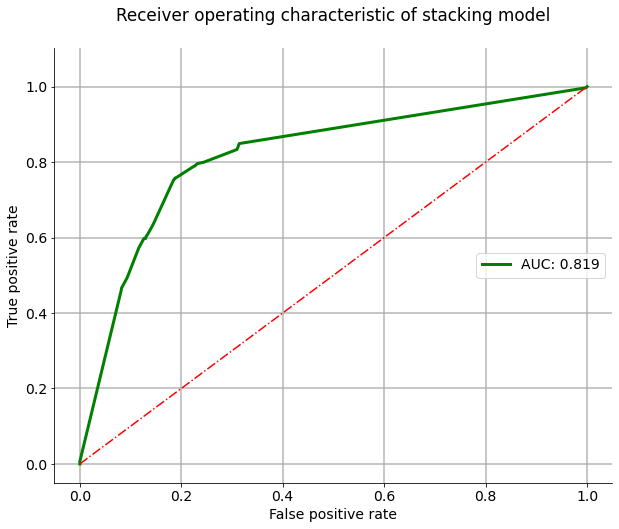

In [59]:
# ROC curve by test data
fpr, tpr, _ = roc_curve(y_test.values, stc.predict_proba(X_test)[:,1])
auc_ = roc_auc_score(y_test, stc.predict_proba(X_test)[:, 1])
ax = plt.axes()
plt.plot(fpr, tpr, 'g-', lw=3, label=f'AUC: {auc_:.3f}')
plt.plot([0, 1], [0, 1], 'r-.')

# plot formatting
plt.legend(loc='center right')
plt.title('Receiver operating characteristic of stacking model\n')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.axis(ymax=ax.get_ylim()[1] * 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=.7, lw=2)
plt.show()

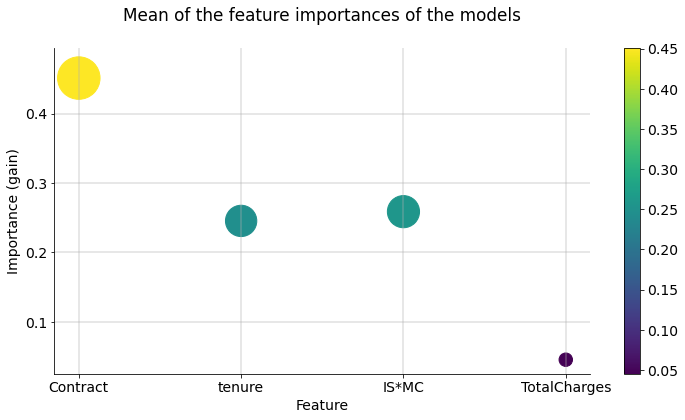

In [60]:
# feature importances of the models
feat_imp = np.c_[xgb.feature_importances_, 
                 ada.feature_importances_,
                 gb.feature_importances_, 
                 rf.feature_importances_,  
                 et.feature_importances_].mean(axis=1)
plt.figure(figsize=(12,6))
ax = plt.axes()
scatter = plt.scatter(x=X.columns, y=feat_imp, c=feat_imp, cmap=cm.viridis, s=4000*feat_imp, marker='o')

# plot formatting
plt.title('Mean of the feature importances of the models\n')
plt.ylabel('Importance (gain)')
plt.xlabel('Feature')
plt.axis(ymax=ax.get_ylim()[1] * 1.05)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(alpha=.3, lw=2)
plt.colorbar()
plt.show()

* Contract is definitely most important feature;
* When using well-fitted (generalized) models TotalCharges already seems like more useless feature.

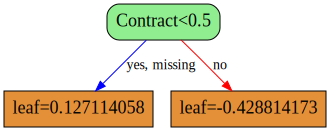

In [61]:
# xgb graphviz
cNodeParams = {'shape':'box',
               'style':'filled,rounded',
               'fillcolor':'lightgreen',
               'fontsize': '18'
              }
lNodeParams = {'shape':'box',
               'style':'filled',
               'fillcolor':'#e49038',
               'fontsize': '18'
              }
XGB.to_graphviz(xgb, condition_node_params=cNodeParams,leaf_node_params=lNodeParams)

# Conclusions
* The most important thought is what we cannot define the classification rules to completely separate leaving and remaining customers. All that remains is to identify a group with a high probability of churn - "target group";
    
    * Target group contains about 75% of all the customers who leaving the company;

    * Precision is about 60%;

    * ROC-AUC is about 82%;

* There may be 4 features used instead of 19 with no quality degradation of the models which gives good performance.
    * Contract;
    * TotalCharges;
    * tenure;
    * $\text{IS*MC} 
    \begin{cases} 
    \text{MonthlyCharges} \\
    \text{InternetService}  
    \end{cases}$
<br><br>
* The vast majority of leaving customers have a month-to-month contract (88% of all departed customers). About 60% of them (exactly among those who leaving the company) leaving the company in the first year. In about 4 years almost all of them (94%) leave. After 5 years the share of remaining customers with a month-to-month contract is about 7% as at the first year this value is 92%;
    
* As the time goes on, fewer customers leave, but the reason is described in the paragraph above - in 4 years almost everyone who had a monthly contract left but since this moment those who have one-year and two-year contract start to leave too and the every month the number of them growing up (but for this moment this number very small).
    
* About 70% of leaving customers who have month-to-month contract have an internet service with a fiber optic cable - "high-cost segment". They are paying much more than those who have DSL or have no internet service at all;
    
* Everybody who sign one-year or two-year contract pretty sure they whant to be client of the company. The task is to try to transfer as much as possible the clients to one-year or two-year contract until they leave. Probably there a sense to apply some discount for a few first month for those who have month-to-month contract and using internet service with a fiber optic cable if they will move to one-year or two-year contract;

* As monthly charges getting higher - the customers more likely to have a churn but it is the price segment that exactly is important here (depends on Internet service). Within the price segments monthly charges does not affect to the share of leaving customers.
    * InternetService = 'Fiber optic' - high-cost segment;
    * InternetService = 'DSL' - medium-cost segment;
    * InternetService = 'No' - low-cost segmet;

**Additional data**<br>
I would request for an additional information.
* Records of every client for every month to consider the problem in the dynamics;
* Feature "number of reports to technical support" could be useful;
* Feature "monthly traffic" could be useful;